## Insurance (Not_renew focused)
### Data Understanding

Elimizde 15.000 müşteri ve 21 farklı değişkenden oluşan kapsamlı bir sigorta datası bulunuyor. Bu veriler, müşteri demografilerinden (cinsiyet, medeni durum, çocuk durumu), sahip oldukları sigorta türlerine (ev, araç, sağlık, ticari, aile hayat), ödeme yöntemlerine ve dijital temas noktalarına kadar geniş bir yelpazeyi kapsıyor. Analizimizin temel amacı, müşterilerin poliçelerini yenileyip yenilemediklerini belirleyen faktörleri ortaya koymak. Bu sayede hem mevcut durumu anlamayı hem de gelecekte poliçe yenileme oranlarını artıracak stratejiler geliştirmeyi hedefliyoruz

In [235]:
# === Setup: Data Analysis Environment ===
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import unicodedata


# Ignore warnings
warnings.filterwarnings("ignore")

# Pandas display options
pd.set_option("display.max_columns", None)   # Show all columns
pd.set_option("display.max_rows", None)      # Show all rows
pd.set_option("display.float_format", "{:.3f}".format)  # Format floats with 3 decimals
pd.set_option("display.width", 1000)         # Wide display

# Seaborn style for nicer plots
sns.set_theme(style="whitegrid")

In [236]:
df_= pd.read_csv("data/ins.csv", sep=",")
df= df_.copy()
df.head()

,PoliçeNumarası,MüşteriCinsiyeti,_65YaşÜzeri,MedeniDurum,ÇocukVarmı,PoliçeSüresi,EvSigortasıVarlığı,AraçSigortasıVarlığı,SağlıkSigortasıVarlığı,TicariSigortaVarlığı,MobilUygulamaKullanımı,ÇağrıMerkeziİletişimi,SonTedaviDetayı,AmeliyatGeçmişi,AileHayatSigortasıVarlığı,SözleşmeTürü,BildirimTercihleri,ÖdemeYöntemi,AylıkÖdemeTutarı,ToplamÖdemeTutarı,PoliçeYenilemeDurumu
0,7590-VHVEG,Kadın,0,Evet,Hayır,1,Yok,Sigortasiz,VarStandard,Rakipte,Kullaniyor,Evet,Ayakta,Hayir,Yok,Temel Hayat Sigortası,eMail,Otomatik Ödeme Talimatı,30,30,Evet
1,5575-GNVDE,Erkek,0,Hayır,Hayır,34,Var,Rakip,VarStandard,Var,Kullanmiyor,BirdenFazla,Ayakta,Hayir,TekKisi,Özel Hayat Sigortası,Mektup,Kredi Kartı ile Taksitli Ödeme,57,1890,Negatif
2,3668-QPYBK,Erkek,0,Hayır,Hayır,2,Var,Rakip,VarStandard,Var,Kullaniyor,Evet,Ayakta,Hayir,TekKisi,Temel Hayat Sigortası,eMail,Kredi Kartı ile Taksitli Ödeme,54,108,Negatif
3,7795-CFOCW,Erkek,0,Hayır,Hayır,45,Yok,Sigortasiz,VarStandard,Var,Kullanmiyor,BirdenFazla,Yatis,Hayir,TekKisi,Özel Hayat Sigortası,Mektup,Kredi Kartı ile Taksitli Ödeme,42,1841,Negatif
4,9237-HQITU,Kadın,0,Hayır,Hayır,2,Var,Rakip,VarKapsamli,Rakipte,Kullanmiyor,Evet,Ayakta,Hayir,TekKisi,Temel Hayat Sigortası,eMail,Otomatik Ödeme Talimatı,71,152,Evet


In [237]:
df.head()

,PoliçeNumarası,MüşteriCinsiyeti,_65YaşÜzeri,MedeniDurum,ÇocukVarmı,PoliçeSüresi,EvSigortasıVarlığı,AraçSigortasıVarlığı,SağlıkSigortasıVarlığı,TicariSigortaVarlığı,MobilUygulamaKullanımı,ÇağrıMerkeziİletişimi,SonTedaviDetayı,AmeliyatGeçmişi,AileHayatSigortasıVarlığı,SözleşmeTürü,BildirimTercihleri,ÖdemeYöntemi,AylıkÖdemeTutarı,ToplamÖdemeTutarı,PoliçeYenilemeDurumu
0,7590-VHVEG,Kadın,0,Evet,Hayır,1,Yok,Sigortasiz,VarStandard,Rakipte,Kullaniyor,Evet,Ayakta,Hayir,Yok,Temel Hayat Sigortası,eMail,Otomatik Ödeme Talimatı,30,30,Evet
1,5575-GNVDE,Erkek,0,Hayır,Hayır,34,Var,Rakip,VarStandard,Var,Kullanmiyor,BirdenFazla,Ayakta,Hayir,TekKisi,Özel Hayat Sigortası,Mektup,Kredi Kartı ile Taksitli Ödeme,57,1890,Negatif
2,3668-QPYBK,Erkek,0,Hayır,Hayır,2,Var,Rakip,VarStandard,Var,Kullaniyor,Evet,Ayakta,Hayir,TekKisi,Temel Hayat Sigortası,eMail,Kredi Kartı ile Taksitli Ödeme,54,108,Negatif
3,7795-CFOCW,Erkek,0,Hayır,Hayır,45,Yok,Sigortasiz,VarStandard,Var,Kullanmiyor,BirdenFazla,Yatis,Hayir,TekKisi,Özel Hayat Sigortası,Mektup,Kredi Kartı ile Taksitli Ödeme,42,1841,Negatif
4,9237-HQITU,Kadın,0,Hayır,Hayır,2,Var,Rakip,VarKapsamli,Rakipte,Kullanmiyor,Evet,Ayakta,Hayir,TekKisi,Temel Hayat Sigortası,eMail,Otomatik Ödeme Talimatı,71,152,Evet


In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   PoliçeNumarası             15000 non-null  object
 1   MüşteriCinsiyeti           15000 non-null  object
 2   _65YaşÜzeri                15000 non-null  int64 
 3   MedeniDurum                15000 non-null  object
 4   ÇocukVarmı                 15000 non-null  object
 5   PoliçeSüresi               15000 non-null  int64 
 6   EvSigortasıVarlığı         15000 non-null  object
 7   AraçSigortasıVarlığı       15000 non-null  object
 8   SağlıkSigortasıVarlığı     15000 non-null  object
 9   TicariSigortaVarlığı       15000 non-null  object
 10  MobilUygulamaKullanımı     15000 non-null  object
 11  ÇağrıMerkeziİletişimi      15000 non-null  object
 12  SonTedaviDetayı            15000 non-null  object
 13  AmeliyatGeçmişi            15000 non-null  object
 14  AileHa

In [239]:
df.describe(include='O').T   ## Kategorik değişkenleri inceleyelim

,count,unique,top,freq
PoliçeNumarası,15000,15000,7590-VHVEG,1
MüşteriCinsiyeti,15000,2,Erkek,7594
MedeniDurum,15000,2,Hayır,7709
ÇocukVarmı,15000,2,Hayır,10486
EvSigortasıVarlığı,15000,2,Var,13549
AraçSigortasıVarlığı,15000,3,Rakip,7268
SağlıkSigortasıVarlığı,15000,3,VarKapsamli,6600
TicariSigortaVarlığı,15000,3,Rakipte,7394
MobilUygulamaKullanımı,15000,2,Kullanmiyor,9815
ÇağrıMerkeziİletişimi,15000,3,Evet,6655


In [240]:
df.describe([0.05,0.1,0.5,0.75,0.90,0.95,0.99]).T  ## int değişkenleri inceleyelim


,count,mean,std,min,5%,10%,50%,75%,90%,95%,99%,max
_65YaşÜzeri,15000.000,0.160,0.367,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000
PoliçeSüresi,15000.000,32.010,24.527,0.000,1.000,2.000,28.000,55.000,69.000,71.000,72.000,72.000
AylıkÖdemeTutarı,15000.000,64.338,30.193,18.000,20.000,20.000,70.000,90.000,103.000,107.000,115.000,119.000
ToplamÖdemeTutarı,15000.000,2289.964,2276.888,19.000,50.000,85.000,1400.500,3808.000,5987.000,6990.100,8059.000,8685.000


## EDA

In [241]:
df.duplicated().sum()

np.int64(0)

In [242]:
df.isnull().sum()   ## Eksik değer analizi yapalım

PoliçeNumarası               0
MüşteriCinsiyeti             0
_65YaşÜzeri                  0
MedeniDurum                  0
ÇocukVarmı                   0
PoliçeSüresi                 0
EvSigortasıVarlığı           0
AraçSigortasıVarlığı         0
SağlıkSigortasıVarlığı       0
TicariSigortaVarlığı         0
MobilUygulamaKullanımı       0
ÇağrıMerkeziİletişimi        0
SonTedaviDetayı              0
AmeliyatGeçmişi              0
AileHayatSigortasıVarlığı    0
SözleşmeTürü                 0
BildirimTercihleri           0
ÖdemeYöntemi                 0
AylıkÖdemeTutarı             0
ToplamÖdemeTutarı            0
PoliçeYenilemeDurumu         0
dtype: int64

In [243]:
df.describe([0.05,0.1,0.5,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,5%,10%,50%,75%,90%,95%,99%,max
_65YaşÜzeri,15000.000,0.160,0.367,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000
PoliçeSüresi,15000.000,32.010,24.527,0.000,1.000,2.000,28.000,55.000,69.000,71.000,72.000,72.000
AylıkÖdemeTutarı,15000.000,64.338,30.193,18.000,20.000,20.000,70.000,90.000,103.000,107.000,115.000,119.000
ToplamÖdemeTutarı,15000.000,2289.964,2276.888,19.000,50.000,85.000,1400.500,3808.000,5987.000,6990.100,8059.000,8685.000


In [244]:
df.head()

,PoliçeNumarası,MüşteriCinsiyeti,_65YaşÜzeri,MedeniDurum,ÇocukVarmı,PoliçeSüresi,EvSigortasıVarlığı,AraçSigortasıVarlığı,SağlıkSigortasıVarlığı,TicariSigortaVarlığı,MobilUygulamaKullanımı,ÇağrıMerkeziİletişimi,SonTedaviDetayı,AmeliyatGeçmişi,AileHayatSigortasıVarlığı,SözleşmeTürü,BildirimTercihleri,ÖdemeYöntemi,AylıkÖdemeTutarı,ToplamÖdemeTutarı,PoliçeYenilemeDurumu
0,7590-VHVEG,Kadın,0,Evet,Hayır,1,Yok,Sigortasiz,VarStandard,Rakipte,Kullaniyor,Evet,Ayakta,Hayir,Yok,Temel Hayat Sigortası,eMail,Otomatik Ödeme Talimatı,30,30,Evet
1,5575-GNVDE,Erkek,0,Hayır,Hayır,34,Var,Rakip,VarStandard,Var,Kullanmiyor,BirdenFazla,Ayakta,Hayir,TekKisi,Özel Hayat Sigortası,Mektup,Kredi Kartı ile Taksitli Ödeme,57,1890,Negatif
2,3668-QPYBK,Erkek,0,Hayır,Hayır,2,Var,Rakip,VarStandard,Var,Kullaniyor,Evet,Ayakta,Hayir,TekKisi,Temel Hayat Sigortası,eMail,Kredi Kartı ile Taksitli Ödeme,54,108,Negatif
3,7795-CFOCW,Erkek,0,Hayır,Hayır,45,Yok,Sigortasiz,VarStandard,Var,Kullanmiyor,BirdenFazla,Yatis,Hayir,TekKisi,Özel Hayat Sigortası,Mektup,Kredi Kartı ile Taksitli Ödeme,42,1841,Negatif
4,9237-HQITU,Kadın,0,Hayır,Hayır,2,Var,Rakip,VarKapsamli,Rakipte,Kullanmiyor,Evet,Ayakta,Hayir,TekKisi,Temel Hayat Sigortası,eMail,Otomatik Ödeme Talimatı,71,152,Evet


In [245]:
df = df.drop(df[df["PoliçeSüresi"] == 0].index) ## Poliçesüresi 0 olanları datamızdan temizleyelim

In [246]:
df = df.drop("PoliçeNumarası", axis=1) ## Kullanılmayacak kolonları temizleyelim

In [247]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = df.select_dtypes(exclude=['object', 'category']).columns.tolist()

In [248]:
cat_cols

['MüşteriCinsiyeti',
 'MedeniDurum',
 'ÇocukVarmı',
 'EvSigortasıVarlığı',
 'AraçSigortasıVarlığı',
 'SağlıkSigortasıVarlığı',
 'TicariSigortaVarlığı',
 'MobilUygulamaKullanımı',
 'ÇağrıMerkeziİletişimi',
 'SonTedaviDetayı',
 'AmeliyatGeçmişi',
 'AileHayatSigortasıVarlığı',
 'SözleşmeTürü',
 'BildirimTercihleri',
 'ÖdemeYöntemi',
 'PoliçeYenilemeDurumu']

In [249]:
num_cols

['_65YaşÜzeri', 'PoliçeSüresi', 'AylıkÖdemeTutarı', 'ToplamÖdemeTutarı']

## Yeni değişken oluşturma 
### Aile segment
>Medeni Hal + Çocuk değişkenlerinden aile segmenti oluşturma 



In [250]:
md_norm = df["MedeniDurum"].astype(str).str.strip().str.lower()
cv_norm = df["ÇocukVarmı"].astype(str).str.strip().str.lower()

In [251]:
medeni_num = md_norm.apply(lambda x: 2 if x == "evet" else 1 if x in ["hayır", "hayir"] else None)
cocuk_num  = cv_norm.apply(lambda x: 1 if x == "evet" else 0 if x in ["hayır", "hayir"] else None)
df["kisi_sayisi"] = medeni_num + cocuk_num

In [252]:
conditions = [
    (df["kisi_sayisi"] == 1) & (md_norm.isin(["hayır","hayir"])),                 # bekar+çocuksuz
    (df["kisi_sayisi"] == 2) & (md_norm.eq("evet")) & (cv_norm.isin(["hayır","hayir"])),  # evli+çocuksuz
    (df["kisi_sayisi"] == 2) & (md_norm.isin(["hayır","hayir"])) & (cv_norm.eq("evet")),  # bekar+çocuklu
    (df["kisi_sayisi"] == 3) & (md_norm.eq("evet")) & (cv_norm.eq("evet")),      # evli+çocuklu
]



labels = [
    "bekar+çocuksuz",
    "evli+çocuksuz",
    "bekar+çocuklu",
    "evli+çocuklu",
]

df["aile_segment"] = np.select(conditions, labels, default="bilinmiyor")

In [253]:
print(df[["MedeniDurum","ÇocukVarmı","kisi_sayisi","aile_segment"]].head())

  MedeniDurum ÇocukVarmı  kisi_sayisi    aile_segment
0        Evet      Hayır            2   evli+çocuksuz
1       Hayır      Hayır            1  bekar+çocuksuz
2       Hayır      Hayır            1  bekar+çocuksuz
3       Hayır      Hayır            1  bekar+çocuksuz
4       Hayır      Hayır            1  bekar+çocuksuz


In [254]:
df["aile_segment"].value_counts()

aile_segment
bekar+çocuksuz    6094
evli+çocuksuz     4386
evli+çocuklu      2893
bekar+çocuklu     1607
Name: count, dtype: int64

In [255]:
df = df.drop("kisi_sayisi", axis=1) ## Kullanılmayacak kolonları temizleyelim

### Sigorta profili
> müşteri hangi sigorta varlıklarını poliçeye dahil etti, sigorta sepetini oluştur bundle yapısı

In [256]:
df.head()

,MüşteriCinsiyeti,_65YaşÜzeri,MedeniDurum,ÇocukVarmı,PoliçeSüresi,EvSigortasıVarlığı,AraçSigortasıVarlığı,SağlıkSigortasıVarlığı,TicariSigortaVarlığı,MobilUygulamaKullanımı,ÇağrıMerkeziİletişimi,SonTedaviDetayı,AmeliyatGeçmişi,AileHayatSigortasıVarlığı,SözleşmeTürü,BildirimTercihleri,ÖdemeYöntemi,AylıkÖdemeTutarı,ToplamÖdemeTutarı,PoliçeYenilemeDurumu,aile_segment
0,Kadın,0,Evet,Hayır,1,Yok,Sigortasiz,VarStandard,Rakipte,Kullaniyor,Evet,Ayakta,Hayir,Yok,Temel Hayat Sigortası,eMail,Otomatik Ödeme Talimatı,30,30,Evet,evli+çocuksuz
1,Erkek,0,Hayır,Hayır,34,Var,Rakip,VarStandard,Var,Kullanmiyor,BirdenFazla,Ayakta,Hayir,TekKisi,Özel Hayat Sigortası,Mektup,Kredi Kartı ile Taksitli Ödeme,57,1890,Negatif,bekar+çocuksuz
2,Erkek,0,Hayır,Hayır,2,Var,Rakip,VarStandard,Var,Kullaniyor,Evet,Ayakta,Hayir,TekKisi,Temel Hayat Sigortası,eMail,Kredi Kartı ile Taksitli Ödeme,54,108,Negatif,bekar+çocuksuz
3,Erkek,0,Hayır,Hayır,45,Yok,Sigortasiz,VarStandard,Var,Kullanmiyor,BirdenFazla,Yatis,Hayir,TekKisi,Özel Hayat Sigortası,Mektup,Kredi Kartı ile Taksitli Ödeme,42,1841,Negatif,bekar+çocuksuz
4,Kadın,0,Hayır,Hayır,2,Var,Rakip,VarKapsamli,Rakipte,Kullanmiyor,Evet,Ayakta,Hayir,TekKisi,Temel Hayat Sigortası,eMail,Otomatik Ödeme Talimatı,71,152,Evet,bekar+çocuksuz


In [257]:
# 1) Sigorta kolonları
sigorta_cols = [
    "EvSigortasıVarlığı", 
    "AraçSigortasıVarlığı", 
    "SağlıkSigortasıVarlığı", 
    "TicariSigortaVarlığı", 
    "AileHayatSigortasıVarlığı"
]

In [258]:
# Yardımcı: metni normalize et (küçük harf, diakritik temizleme, boşluk silme)
def _norm(s: str) -> str:
    s = s.strip().lower()
    s = ''.join(
        c for c in unicodedata.normalize('NFKD', s)
        if not unicodedata.combining(c)
    )
    s = s.replace(" ", "")
    return s

# 2) Normalize et: 'var' içeriyorsa veya 'tekkisi' ise 1; aksi 0
def normalize_sigorta(val):
    if pd.isna(val):
        return 0
    v = _norm(str(val))
    # 'var' içeren tüm varyasyonlar: var, varstandart, varkapsamli, ... -> 1
    if "var" in v:
        return 1
    # 'TekKisi' varyasyonları: tekkisi, tek-kisi, tek kişi, tekkişi -> 1
    if "tekkisi" in v:
        return 1
    # diğer durumlar (rakipte, yok, ticari degil, vs.) -> 0
    return 0

for col in sigorta_cols:
    df[col + "_bin"] = df[col].apply(normalize_sigorta)

# 3) Sepet büyüklüğü
df["sigorta_sayısı"] = df[[c + "_bin" for c in sigorta_cols]].sum(axis=1)

# 4) Kombinasyon profili stringi
def build_profile(row):
    aktifler = []
    for col in sigorta_cols:
        if row[col + "_bin"] == 1:
            # kolon adını kısalt: "Varlığı" ve "Sigortası" gibi ifadeleri çıkar
            clean_name = (col
                          .replace("SigortasıVarlığı", "")
                          .replace("Varlığı", "")
                          .replace("Sigortası", "")
                          .replace("SözleşmeTürü", "Sözleşme")
                          .strip())
            aktifler.append(clean_name)
    return "+".join(aktifler) if aktifler else "Yok"

df["sigorta_profili"] = df.apply(build_profile, axis=1)


In [259]:
# 5) Örnek kontrol
print(df[["sigorta_profili", "sigorta_sayısı"]].head())

                     sigorta_profili  sigorta_sayısı
0                             Sağlık               1
1  Ev+Sağlık+TicariSigorta+AileHayat               4
2  Ev+Sağlık+TicariSigorta+AileHayat               4
3     Sağlık+TicariSigorta+AileHayat               3
4                Ev+Sağlık+AileHayat               3


In [260]:
df["sigorta_profili"].value_counts()

sigorta_profili
Ev+Sağlık+AileHayat                       2758
Ev+Araç+Sağlık+AileHayat                  2461
Ev+Araç+Sağlık+TicariSigorta+AileHayat    1219
Ev+Sağlık+TicariSigorta+AileHayat         1183
Ev+Sağlık                                 1039
Ev+AileHayat                              1009
Ev+Araç+Sağlık                             821
Ev                                         815
Ev+Sağlık+TicariSigorta                    505
Sağlık+AileHayat                           471
Ev+Araç+Sağlık+TicariSigorta               454
Ev+Araç+AileHayat                          410
Ev+Araç                                    371
Sağlık+TicariSigorta+AileHayat             260
Ev+TicariSigorta+AileHayat                 193
Sağlık                                     164
Ev+Araç+TicariSigorta+AileHayat            149
Araç+Sağlık+AileHayat                      142
Sağlık+TicariSigorta                       123
Ev+TicariSigorta                            88
Ev+Araç+TicariSigorta                       

In [261]:
df.head()

,MüşteriCinsiyeti,_65YaşÜzeri,MedeniDurum,ÇocukVarmı,PoliçeSüresi,EvSigortasıVarlığı,AraçSigortasıVarlığı,SağlıkSigortasıVarlığı,TicariSigortaVarlığı,MobilUygulamaKullanımı,ÇağrıMerkeziİletişimi,SonTedaviDetayı,AmeliyatGeçmişi,AileHayatSigortasıVarlığı,SözleşmeTürü,BildirimTercihleri,ÖdemeYöntemi,AylıkÖdemeTutarı,ToplamÖdemeTutarı,PoliçeYenilemeDurumu,aile_segment,EvSigortasıVarlığı_bin,AraçSigortasıVarlığı_bin,SağlıkSigortasıVarlığı_bin,TicariSigortaVarlığı_bin,AileHayatSigortasıVarlığı_bin,sigorta_sayısı,sigorta_profili
0,Kadın,0,Evet,Hayır,1,Yok,Sigortasiz,VarStandard,Rakipte,Kullaniyor,Evet,Ayakta,Hayir,Yok,Temel Hayat Sigortası,eMail,Otomatik Ödeme Talimatı,30,30,Evet,evli+çocuksuz,0,0,1,0,0,1,Sağlık
1,Erkek,0,Hayır,Hayır,34,Var,Rakip,VarStandard,Var,Kullanmiyor,BirdenFazla,Ayakta,Hayir,TekKisi,Özel Hayat Sigortası,Mektup,Kredi Kartı ile Taksitli Ödeme,57,1890,Negatif,bekar+çocuksuz,1,0,1,1,1,4,Ev+Sağlık+TicariSigorta+AileHayat
2,Erkek,0,Hayır,Hayır,2,Var,Rakip,VarStandard,Var,Kullaniyor,Evet,Ayakta,Hayir,TekKisi,Temel Hayat Sigortası,eMail,Kredi Kartı ile Taksitli Ödeme,54,108,Negatif,bekar+çocuksuz,1,0,1,1,1,4,Ev+Sağlık+TicariSigorta+AileHayat
3,Erkek,0,Hayır,Hayır,45,Yok,Sigortasiz,VarStandard,Var,Kullanmiyor,BirdenFazla,Yatis,Hayir,TekKisi,Özel Hayat Sigortası,Mektup,Kredi Kartı ile Taksitli Ödeme,42,1841,Negatif,bekar+çocuksuz,0,0,1,1,1,3,Sağlık+TicariSigorta+AileHayat
4,Kadın,0,Hayır,Hayır,2,Var,Rakip,VarKapsamli,Rakipte,Kullanmiyor,Evet,Ayakta,Hayir,TekKisi,Temel Hayat Sigortası,eMail,Otomatik Ödeme Talimatı,71,152,Evet,bekar+çocuksuz,1,0,1,0,1,3,Ev+Sağlık+AileHayat


In [262]:
## datayı temizle, gereksiz kolonları dropla

df = df.drop(["EvSigortasıVarlığı_bin","AraçSigortasıVarlığı_bin",
              "SağlıkSigortasıVarlığı_bin","TicariSigortaVarlığı_bin",
              "AileHayatSigortasıVarlığı_bin"], axis=1)

In [263]:
df.head()

,MüşteriCinsiyeti,_65YaşÜzeri,MedeniDurum,ÇocukVarmı,PoliçeSüresi,EvSigortasıVarlığı,AraçSigortasıVarlığı,SağlıkSigortasıVarlığı,TicariSigortaVarlığı,MobilUygulamaKullanımı,ÇağrıMerkeziİletişimi,SonTedaviDetayı,AmeliyatGeçmişi,AileHayatSigortasıVarlığı,SözleşmeTürü,BildirimTercihleri,ÖdemeYöntemi,AylıkÖdemeTutarı,ToplamÖdemeTutarı,PoliçeYenilemeDurumu,aile_segment,sigorta_sayısı,sigorta_profili
0,Kadın,0,Evet,Hayır,1,Yok,Sigortasiz,VarStandard,Rakipte,Kullaniyor,Evet,Ayakta,Hayir,Yok,Temel Hayat Sigortası,eMail,Otomatik Ödeme Talimatı,30,30,Evet,evli+çocuksuz,1,Sağlık
1,Erkek,0,Hayır,Hayır,34,Var,Rakip,VarStandard,Var,Kullanmiyor,BirdenFazla,Ayakta,Hayir,TekKisi,Özel Hayat Sigortası,Mektup,Kredi Kartı ile Taksitli Ödeme,57,1890,Negatif,bekar+çocuksuz,4,Ev+Sağlık+TicariSigorta+AileHayat
2,Erkek,0,Hayır,Hayır,2,Var,Rakip,VarStandard,Var,Kullaniyor,Evet,Ayakta,Hayir,TekKisi,Temel Hayat Sigortası,eMail,Kredi Kartı ile Taksitli Ödeme,54,108,Negatif,bekar+çocuksuz,4,Ev+Sağlık+TicariSigorta+AileHayat
3,Erkek,0,Hayır,Hayır,45,Yok,Sigortasiz,VarStandard,Var,Kullanmiyor,BirdenFazla,Yatis,Hayir,TekKisi,Özel Hayat Sigortası,Mektup,Kredi Kartı ile Taksitli Ödeme,42,1841,Negatif,bekar+çocuksuz,3,Sağlık+TicariSigorta+AileHayat
4,Kadın,0,Hayır,Hayır,2,Var,Rakip,VarKapsamli,Rakipte,Kullanmiyor,Evet,Ayakta,Hayir,TekKisi,Temel Hayat Sigortası,eMail,Otomatik Ödeme Talimatı,71,152,Evet,bekar+çocuksuz,3,Ev+Sağlık+AileHayat


In [264]:
df.columns

Index(['MüşteriCinsiyeti', '_65YaşÜzeri', 'MedeniDurum', 'ÇocukVarmı', 'PoliçeSüresi', 'EvSigortasıVarlığı', 'AraçSigortasıVarlığı', 'SağlıkSigortasıVarlığı', 'TicariSigortaVarlığı', 'MobilUygulamaKullanımı', 'ÇağrıMerkeziİletişimi', 'SonTedaviDetayı', 'AmeliyatGeçmişi', 'AileHayatSigortasıVarlığı', 'SözleşmeTürü', 'BildirimTercihleri', 'ÖdemeYöntemi', 'AylıkÖdemeTutarı', 'ToplamÖdemeTutarı', 'PoliçeYenilemeDurumu', 'aile_segment', 'sigorta_sayısı', 'sigorta_profili'], dtype='object')

###  Fark oran, Fark,Farksegment
> Aylık ödeme*poliçe süresi <> toplam ödeme tutar (İndirim/Ek Prim farkı)

In [265]:
if {"PoliçeSüresi", "AylıkÖdemeTutarı", "ToplamÖdemeTutarı"}.issubset(df.columns):
    df["Beklenen_aylık_tutar"] = df["ToplamÖdemeTutarı"] / df["PoliçeSüresi"]
    df["Aylık_fark_oran"] = df["Beklenen_aylık_tutar"] / df["AylıkÖdemeTutarı"]

    # Koşullu etiketleme
    df["FarkSegment"] = np.where(
        df["Aylık_fark_oran"] == 1.000, "Uygun",
        np.where(df["Aylık_fark_oran"] < 1.000, "İndirim/Kampanya", "Ek Prim")
    )

    display(
        df[
            [
                "PoliçeSüresi",
                "AylıkÖdemeTutarı",
                "ToplamÖdemeTutarı",
                "Beklenen_aylık_tutar",
                "Aylık_fark_oran",
                "FarkSegment",
            ]
        ].head()
    )

,PoliçeSüresi,AylıkÖdemeTutarı,ToplamÖdemeTutarı,Beklenen_aylık_tutar,Aylık_fark_oran,FarkSegment
0,1,30,30,30.000,1.000,Uygun
1,34,57,1890,55.588,0.975,İndirim/Kampanya
2,2,54,108,54.000,1.000,Uygun
3,45,42,1841,40.911,0.974,İndirim/Kampanya
4,2,71,152,76.000,1.070,Ek Prim


In [266]:
df = df.drop(["Beklenen_aylık_tutar"], axis=1)

In [267]:
df.head()

,MüşteriCinsiyeti,_65YaşÜzeri,MedeniDurum,ÇocukVarmı,PoliçeSüresi,EvSigortasıVarlığı,AraçSigortasıVarlığı,SağlıkSigortasıVarlığı,TicariSigortaVarlığı,MobilUygulamaKullanımı,ÇağrıMerkeziİletişimi,SonTedaviDetayı,AmeliyatGeçmişi,AileHayatSigortasıVarlığı,SözleşmeTürü,BildirimTercihleri,ÖdemeYöntemi,AylıkÖdemeTutarı,ToplamÖdemeTutarı,PoliçeYenilemeDurumu,aile_segment,sigorta_sayısı,sigorta_profili,Aylık_fark_oran,FarkSegment
0,Kadın,0,Evet,Hayır,1,Yok,Sigortasiz,VarStandard,Rakipte,Kullaniyor,Evet,Ayakta,Hayir,Yok,Temel Hayat Sigortası,eMail,Otomatik Ödeme Talimatı,30,30,Evet,evli+çocuksuz,1,Sağlık,1.000,Uygun
1,Erkek,0,Hayır,Hayır,34,Var,Rakip,VarStandard,Var,Kullanmiyor,BirdenFazla,Ayakta,Hayir,TekKisi,Özel Hayat Sigortası,Mektup,Kredi Kartı ile Taksitli Ödeme,57,1890,Negatif,bekar+çocuksuz,4,Ev+Sağlık+TicariSigorta+AileHayat,0.975,İndirim/Kampanya
2,Erkek,0,Hayır,Hayır,2,Var,Rakip,VarStandard,Var,Kullaniyor,Evet,Ayakta,Hayir,TekKisi,Temel Hayat Sigortası,eMail,Kredi Kartı ile Taksitli Ödeme,54,108,Negatif,bekar+çocuksuz,4,Ev+Sağlık+TicariSigorta+AileHayat,1.000,Uygun
3,Erkek,0,Hayır,Hayır,45,Yok,Sigortasiz,VarStandard,Var,Kullanmiyor,BirdenFazla,Yatis,Hayir,TekKisi,Özel Hayat Sigortası,Mektup,Kredi Kartı ile Taksitli Ödeme,42,1841,Negatif,bekar+çocuksuz,3,Sağlık+TicariSigorta+AileHayat,0.974,İndirim/Kampanya
4,Kadın,0,Hayır,Hayır,2,Var,Rakip,VarKapsamli,Rakipte,Kullanmiyor,Evet,Ayakta,Hayir,TekKisi,Temel Hayat Sigortası,eMail,Otomatik Ödeme Talimatı,71,152,Evet,bekar+çocuksuz,3,Ev+Sağlık+AileHayat,1.070,Ek Prim


## Hedef değişken tanımlama

In [268]:

target_var= "PoliçeYenilemeDurumu"
renew_counts = df[target_var].value_counts().to_frame("Adet")
renew_counts["Oran_%"] = (renew_counts["Adet"] / len(df) * 100).round(2)


df["not_renew"] = df["PoliçeYenilemeDurumu"].apply(lambda x : 1 if x == "Negatif" else 0 )
display(renew_counts)

,Adet,Oran_%
PoliçeYenilemeDurumu,,
Evet,10878,72.620
Negatif,4102,27.380


In [269]:
df = df.drop("PoliçeYenilemeDurumu", axis=1)

In [270]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = df.select_dtypes(exclude=['object', 'category']).columns.tolist()

## Kategorik değerleri normalize etme

In [271]:
# Basit normalize: baş-son boşluk, küçük harf, standart karşılık
mapping = {
    "evet":"Evet","hayır":"Hayır","hayir":"Hayır",
    "var":"Var","yok":"Yok",
    "negatif":"Negatif",
    "rakip":"Rakip","sigortasiz":"Sigortasiz","sigortasız":"Sigortasiz",
    "email":"eMail","e-mail":"eMail","e posta":"eMail","eposta":"eMail",
    "mektup":"Mektup"
}

def normalize_text(x):
    if pd.isna(x): 
        return x
    s = str(x).strip()
    low = s.lower()
    return mapping.get(low, s)

for c in cat_cols:
    df[c] = df[c].apply(normalize_text)



## Kategorik değişken analizi

In [272]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = df.select_dtypes(exclude=['object', 'category']).columns.tolist()

,MüşteriCinsiyeti,Ratio
MüşteriCinsiyeti,,
Erkek,7581,50.607
Kadın,7399,49.393


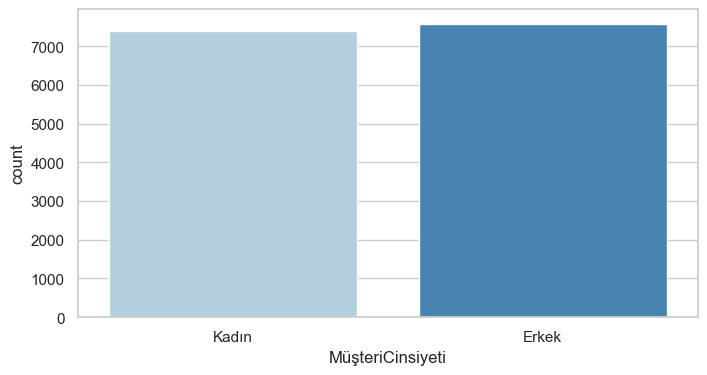

,MedeniDurum,Ratio
MedeniDurum,,
Hayır,7701,51.409
Evet,7279,48.591


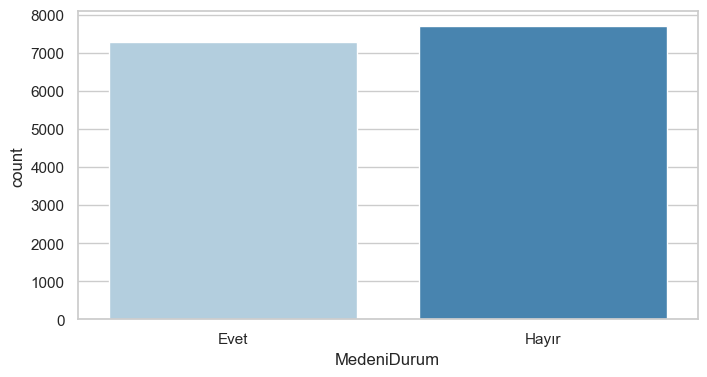

,ÇocukVarmı,Ratio
ÇocukVarmı,,
Hayır,10480,69.960
Evet,4500,30.040


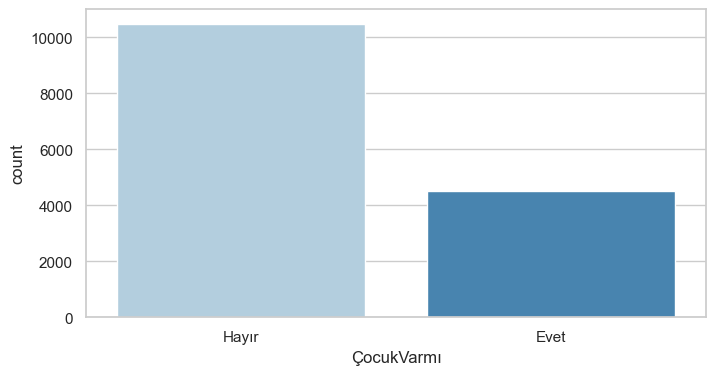

,EvSigortasıVarlığı,Ratio
EvSigortasıVarlığı,,
Var,13532,90.334
Yok,1448,9.666


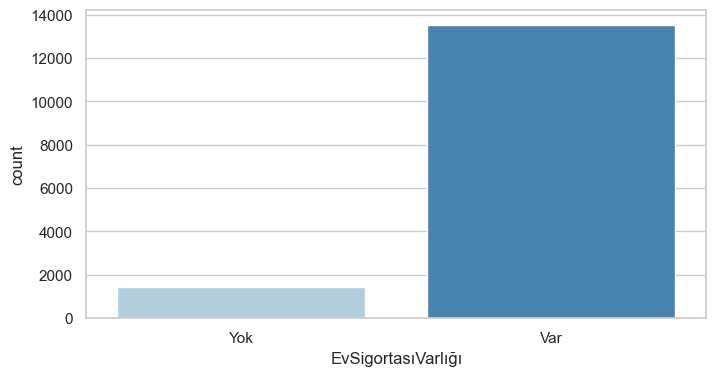

,AraçSigortasıVarlığı,Ratio
AraçSigortasıVarlığı,,
Rakip,7259,48.458
Var,6277,41.903
Sigortasiz,1444,9.640


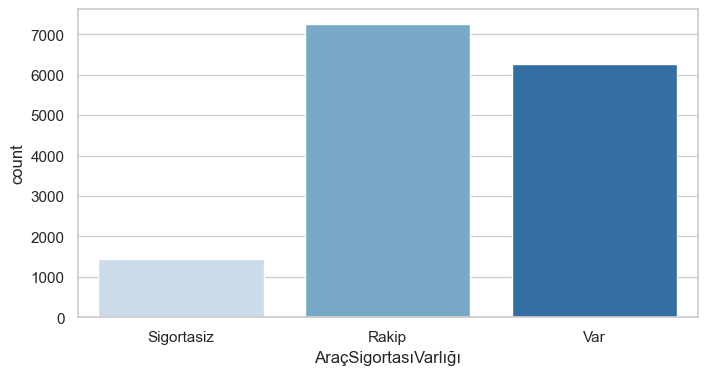

,SağlıkSigortasıVarlığı,Ratio
SağlıkSigortasıVarlığı,,
VarKapsamli,6598,44.045
VarStandard,5126,34.219
Yok,3256,21.736


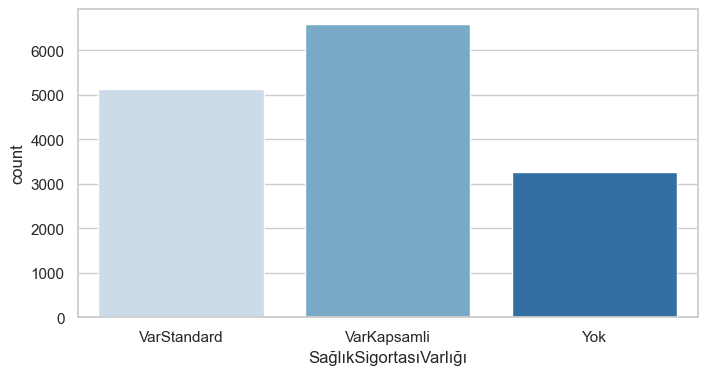

,TicariSigortaVarlığı,Ratio
TicariSigortaVarlığı,,
Rakipte,7388,49.319
Var,4362,29.119
TicariDegil,3230,21.562


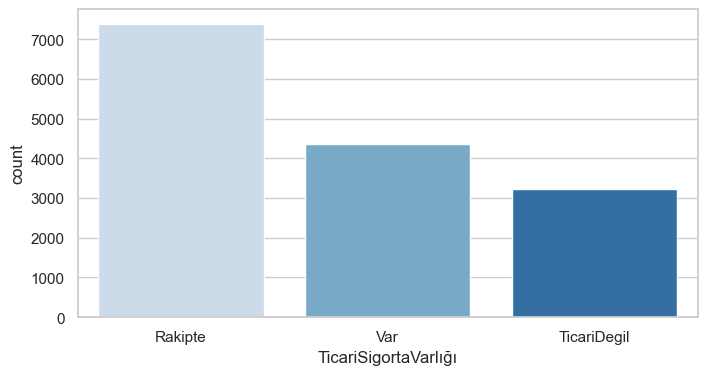

,MobilUygulamaKullanımı,Ratio
MobilUygulamaKullanımı,,
Kullanmiyor,9804,65.447
Kullaniyor,5176,34.553


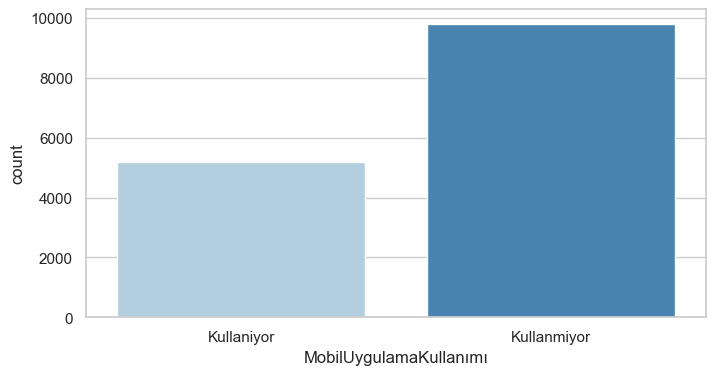

,ÇağrıMerkeziİletişimi,Ratio
ÇağrıMerkeziİletişimi,,
Evet,6651,44.399
BirdenFazla,5047,33.692
Hayır,3282,21.909


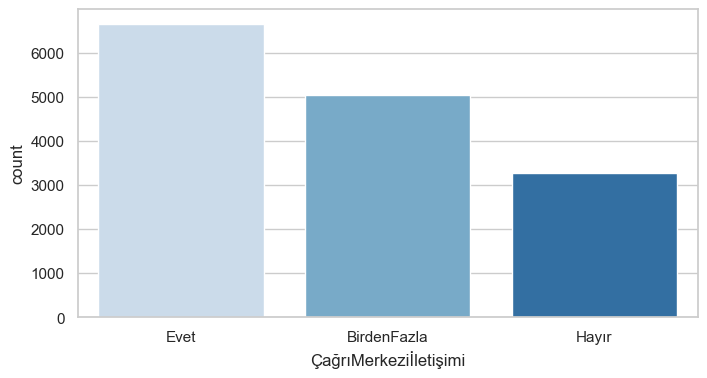

,SonTedaviDetayı,Ratio
SonTedaviDetayı,,
Ayakta,7442,49.680
Yatis,4267,28.485
3 Aydir Yok,3271,21.836


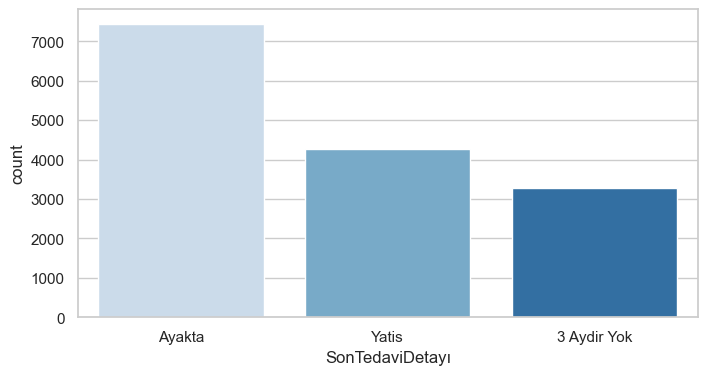

,AmeliyatGeçmişi,Ratio
AmeliyatGeçmişi,,
Hayır,8953,59.766
Evet,5746,38.358
Planlanan,281,1.876


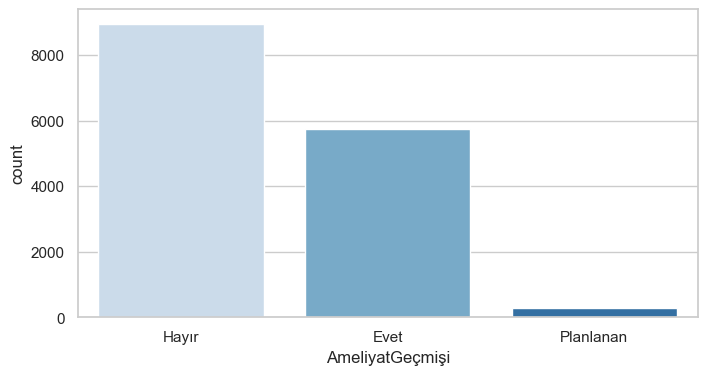

,AileHayatSigortasıVarlığı,Ratio
AileHayatSigortasıVarlığı,,
TekKisi,7016,46.836
Yok,4560,30.441
Var,3404,22.724


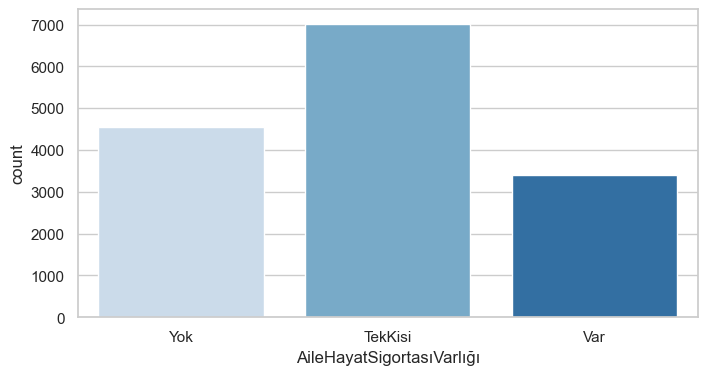

,SözleşmeTürü,Ratio
SözleşmeTürü,,
Temel Hayat Sigortası,8243,55.027
Prim Geri Ödemeli Hayat Sigortası,3623,24.186
Özel Hayat Sigortası,3114,20.788


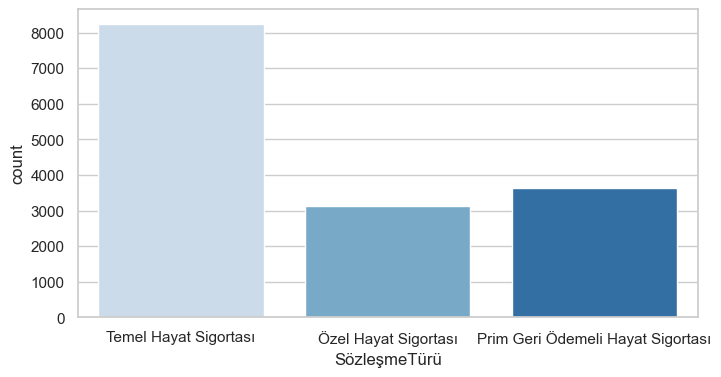

,BildirimTercihleri,Ratio
BildirimTercihleri,,
eMail,8909,59.473
Mektup,6071,40.527


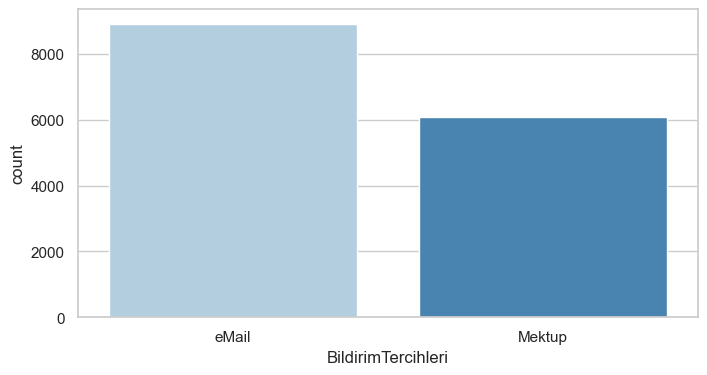

,ÖdemeYöntemi,Ratio
ÖdemeYöntemi,,
Kredi Kartı ile Taksitli Ödeme,9976,66.595
Otomatik Ödeme Talimatı,5004,33.405


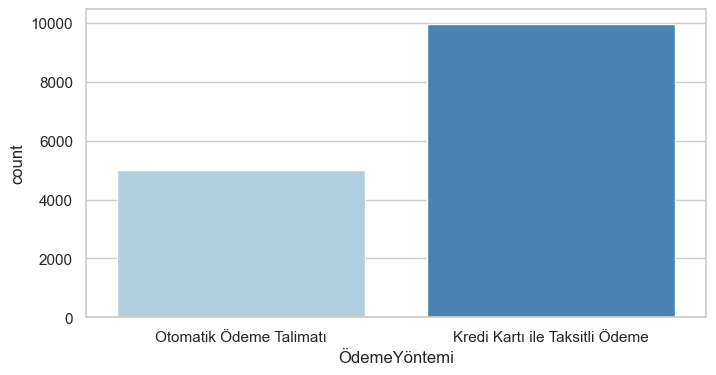

,aile_segment,Ratio
aile_segment,,
bekar+çocuksuz,6094,40.681
evli+çocuksuz,4386,29.279
evli+çocuklu,2893,19.312
bekar+çocuklu,1607,10.728


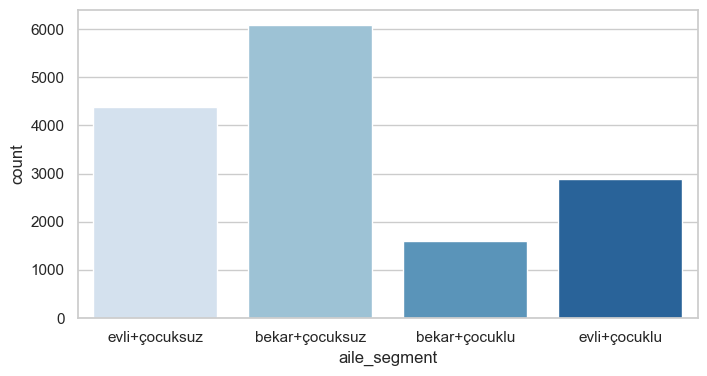

,sigorta_profili,Ratio
sigorta_profili,,
Ev+Sağlık+AileHayat,2758,18.411
Ev+Araç+Sağlık+AileHayat,2461,16.429
Ev+Araç+Sağlık+TicariSigorta+AileHayat,1219,8.138
Ev+Sağlık+TicariSigorta+AileHayat,1183,7.897
Ev+Sağlık,1039,6.936
Ev+AileHayat,1009,6.736
Ev+Araç+Sağlık,821,5.481
Ev,815,5.441
Ev+Sağlık+TicariSigorta,505,3.371


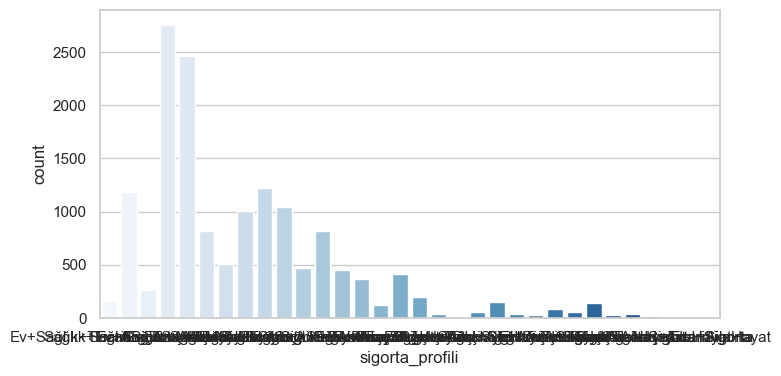

,FarkSegment,Ratio
FarkSegment,,
Ek Prim,7260,48.465
İndirim/Kampanya,7039,46.989
Uygun,681,4.546


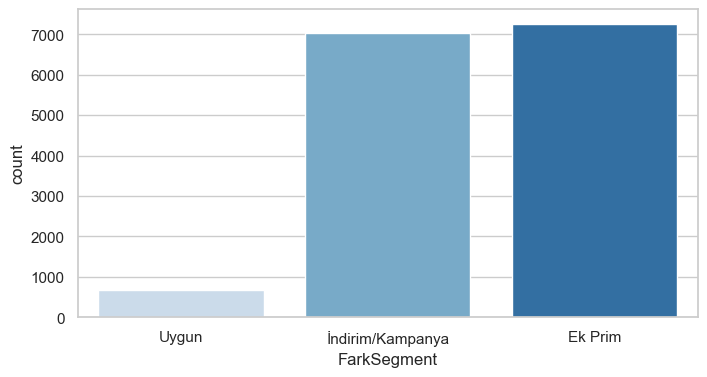

In [273]:
for col in cat_cols:
        display(pd.DataFrame({col: df[col].value_counts(),
                        "Ratio": 100 * df[col].value_counts() / len(df)}))
        plt.figure(figsize=(8, 4))
        sns.countplot(x=col, data=df, palette='Blues')
        plt.show()

In [274]:
df[cat_cols].describe(include="all").T
#kategorik değişkenlerin özet istatistiklerini, kolon bazında satırlara döndürülmüş şekilde göster

,count,unique,top,freq
MüşteriCinsiyeti,14980,2,Erkek,7581
MedeniDurum,14980,2,Hayır,7701
ÇocukVarmı,14980,2,Hayır,10480
EvSigortasıVarlığı,14980,2,Var,13532
AraçSigortasıVarlığı,14980,3,Rakip,7259
SağlıkSigortasıVarlığı,14980,3,VarKapsamli,6598
TicariSigortaVarlığı,14980,3,Rakipte,7388
MobilUygulamaKullanımı,14980,2,Kullanmiyor,9804
ÇağrıMerkeziİletişimi,14980,3,Evet,6651
SonTedaviDetayı,14980,3,Ayakta,7442


In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14980 entries, 0 to 14999
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   MüşteriCinsiyeti           14980 non-null  object 
 1   _65YaşÜzeri                14980 non-null  int64  
 2   MedeniDurum                14980 non-null  object 
 3   ÇocukVarmı                 14980 non-null  object 
 4   PoliçeSüresi               14980 non-null  int64  
 5   EvSigortasıVarlığı         14980 non-null  object 
 6   AraçSigortasıVarlığı       14980 non-null  object 
 7   SağlıkSigortasıVarlığı     14980 non-null  object 
 8   TicariSigortaVarlığı       14980 non-null  object 
 9   MobilUygulamaKullanımı     14980 non-null  object 
 10  ÇağrıMerkeziİletişimi      14980 non-null  object 
 11  SonTedaviDetayı            14980 non-null  object 
 12  AmeliyatGeçmişi            14980 non-null  object 
 13  AileHayatSigortasıVarlığı  14980 non-null  object 


### Diagnostic Analiz

> Riskli segmentler→kredi kartı taksit ödemesi, mobil app kullanmayan,çağrı merkezine sık arayan, Hayat + Hayat DışıSigorta, bekar+çocuksuz, Temel Hayat Sigortası	
> 
> Sadakati yüksek segmentler → otomatik ödeme, mobil app kullanıcıları, kapsamlı sağlık sigortası olan

In [276]:
def cat_overview_with_target(d, col, target=target_var):
    # Kategori toplam adet ve dataset içindeki pay
    tmp = d.groupby(col, dropna=False).size().to_frame("Adet")
    tmp["adet_oran%"] = (tmp["Adet"] / len(d) * 100).round(2)

    # Kategori içi yenileme oranı (mean)
    if "not_renew" in d.columns:
        rate = d.groupby(col, dropna=False)["not_renew"].mean().to_frame("kendi_içi_yenilememe_oran")*100
        tmp = tmp.join(rate)

        # Segment bazında yenileyen sayısı
        seg_not_renew = d.groupby(col, dropna=False)["not_renew"].sum().to_frame("SegmentYenilememeAdet").astype(int)
        tmp = tmp.join(seg_not_renew)

        # Toplam yenileyen sayısı (tek değer)
        total_not_renewals = int(d["not_renew"].sum())
        tmp["TotalYenilememeAdet"] = total_not_renewals

        # Toplam yenilemeler içindeki pay (toplamı %100)
        tmp["yenilememe_oran%"] = (tmp["SegmentYenilememeAdet"] / total_not_renewals * 100).round(2)

    # Adet çoktan aza sıralı göster
    return tmp.sort_values("Adet", ascending=False)

# --- FarkSegment'i cat_cols'a ekle ---
cat_cols_extended = cat_cols.copy()
if "FarkSegment" in df.columns and "FarkSegment" not in cat_cols_extended:
    cat_cols_extended.append("FarkSegment")

# --- Tüm kategorik özetleri üret ---
cat_summaries = {}
for c in cat_cols_extended:
    if c == target_var:   # hedef değişkeni atla
        continue
    cat_summaries[c] = cat_overview_with_target(df, c, target_var)

# --- Tüm kategorik özetleri göster ---
for col, table in cat_summaries.items():
    print(f"\n--- {col} ---")
    display(table)
    


--- MüşteriCinsiyeti ---


,Adet,adet_oran%,kendi_içi_yenilememe_oran,SegmentYenilememeAdet,TotalYenilememeAdet,yenilememe_oran%
MüşteriCinsiyeti,,,,,,
Erkek,7581,50.610,27.516,2086,4102,50.850
Kadın,7399,49.390,27.247,2016,4102,49.150



--- MedeniDurum ---


,Adet,adet_oran%,kendi_içi_yenilememe_oran,SegmentYenilememeAdet,TotalYenilememeAdet,yenilememe_oran%
MedeniDurum,,,,,,
Hayır,7701,51.410,30.580,2355,4102,57.410
Evet,7279,48.590,24.001,1747,4102,42.590



--- ÇocukVarmı ---


,Adet,adet_oran%,kendi_içi_yenilememe_oran,SegmentYenilememeAdet,TotalYenilememeAdet,yenilememe_oran%
ÇocukVarmı,,,,,,
Hayır,10480,69.960,29.790,3122,4102,76.110
Evet,4500,30.040,21.778,980,4102,23.890



--- EvSigortasıVarlığı ---


,Adet,adet_oran%,kendi_içi_yenilememe_oran,SegmentYenilememeAdet,TotalYenilememeAdet,yenilememe_oran%
EvSigortasıVarlığı,,,,,,
Var,13532,90.330,27.476,3718,4102,90.640
Yok,1448,9.670,26.519,384,4102,9.360



--- AraçSigortasıVarlığı ---


,Adet,adet_oran%,kendi_içi_yenilememe_oran,SegmentYenilememeAdet,TotalYenilememeAdet,yenilememe_oran%
AraçSigortasıVarlığı,,,,,,
Rakip,7259,48.460,26.808,1946,4102,47.440
Var,6277,41.900,27.911,1752,4102,42.710
Sigortasiz,1444,9.640,27.978,404,4102,9.850



--- SağlıkSigortasıVarlığı ---


,Adet,adet_oran%,kendi_içi_yenilememe_oran,SegmentYenilememeAdet,TotalYenilememeAdet,yenilememe_oran%
SağlıkSigortasıVarlığı,,,,,,
VarKapsamli,6598,44.050,34.404,2270,4102,55.340
VarStandard,5126,34.220,23.956,1228,4102,29.940
Yok,3256,21.740,18.550,604,4102,14.720



--- TicariSigortaVarlığı ---


,Adet,adet_oran%,kendi_içi_yenilememe_oran,SegmentYenilememeAdet,TotalYenilememeAdet,yenilememe_oran%
TicariSigortaVarlığı,,,,,,
Rakipte,7388,49.320,34.421,2543,4102,61.990
Var,4362,29.120,22.123,965,4102,23.530
TicariDegil,3230,21.560,18.390,594,4102,14.480



--- MobilUygulamaKullanımı ---


,Adet,adet_oran%,kendi_içi_yenilememe_oran,SegmentYenilememeAdet,TotalYenilememeAdet,yenilememe_oran%
MobilUygulamaKullanımı,,,,,,
Kullanmiyor,9804,65.450,28.488,2793,4102,68.090
Kullaniyor,5176,34.550,25.290,1309,4102,31.910



--- ÇağrıMerkeziİletişimi ---


,Adet,adet_oran%,kendi_içi_yenilememe_oran,SegmentYenilememeAdet,TotalYenilememeAdet,yenilememe_oran%
ÇağrıMerkeziİletişimi,,,,,,
Evet,6651,44.400,33.454,2225,4102,54.240
BirdenFazla,5047,33.690,25.342,1279,4102,31.180
Hayır,3282,21.910,18.221,598,4102,14.580



--- SonTedaviDetayı ---


,Adet,adet_oran%,kendi_içi_yenilememe_oran,SegmentYenilememeAdet,TotalYenilememeAdet,yenilememe_oran%
SonTedaviDetayı,,,,,,
Ayakta,7442,49.680,34.171,2543,4102,61.990
Yatis,4267,28.480,22.170,946,4102,23.060
3 Aydir Yok,3271,21.840,18.740,613,4102,14.940



--- AmeliyatGeçmişi ---


,Adet,adet_oran%,kendi_içi_yenilememe_oran,SegmentYenilememeAdet,TotalYenilememeAdet,yenilememe_oran%
AmeliyatGeçmişi,,,,,,
Hayır,8953,59.770,26.449,2368,4102,57.730
Evet,5746,38.360,29.325,1685,4102,41.080
Planlanan,281,1.880,17.438,49,4102,1.190



--- AileHayatSigortasıVarlığı ---


,Adet,adet_oran%,kendi_içi_yenilememe_oran,SegmentYenilememeAdet,TotalYenilememeAdet,yenilememe_oran%
AileHayatSigortasıVarlığı,,,,,,
TekKisi,7016,46.840,31.229,2191,4102,53.410
Yok,4560,30.440,22.851,1042,4102,25.400
Var,3404,22.720,25.529,869,4102,21.180



--- SözleşmeTürü ---


,Adet,adet_oran%,kendi_içi_yenilememe_oran,SegmentYenilememeAdet,TotalYenilememeAdet,yenilememe_oran%
SözleşmeTürü,,,,,,
Temel Hayat Sigortası,8243,55.030,34.648,2856,4102,69.620
Prim Geri Ödemeli Hayat Sigortası,3623,24.190,16.533,599,4102,14.600
Özel Hayat Sigortası,3114,20.790,20.777,647,4102,15.770



--- BildirimTercihleri ---


,Adet,adet_oran%,kendi_içi_yenilememe_oran,SegmentYenilememeAdet,TotalYenilememeAdet,yenilememe_oran%
BildirimTercihleri,,,,,,
eMail,8909,59.470,30.452,2713,4102,66.140
Mektup,6071,40.530,22.879,1389,4102,33.860



--- ÖdemeYöntemi ---


,Adet,adet_oran%,kendi_içi_yenilememe_oran,SegmentYenilememeAdet,TotalYenilememeAdet,yenilememe_oran%
ÖdemeYöntemi,,,,,,
Kredi Kartı ile Taksitli Ödeme,9976,66.600,23.095,2304,4102,56.170
Otomatik Ödeme Talimatı,5004,33.400,35.931,1798,4102,43.830



--- aile_segment ---


,Adet,adet_oran%,kendi_içi_yenilememe_oran,SegmentYenilememeAdet,TotalYenilememeAdet,yenilememe_oran%
aile_segment,,,,,,
bekar+çocuksuz,6094,40.680,31.588,1925,4102,46.930
evli+çocuksuz,4386,29.280,27.291,1197,4102,29.180
evli+çocuklu,2893,19.310,19.011,550,4102,13.410
bekar+çocuklu,1607,10.730,26.758,430,4102,10.480



--- sigorta_profili ---


,Adet,adet_oran%,kendi_içi_yenilememe_oran,SegmentYenilememeAdet,TotalYenilememeAdet,yenilememe_oran%
sigorta_profili,,,,,,
Ev+Sağlık+AileHayat,2758,18.410,35.134,969,4102,23.620
Ev+Araç+Sağlık+AileHayat,2461,16.430,36.286,893,4102,21.770
Ev+Araç+Sağlık+TicariSigorta+AileHayat,1219,8.140,19.442,237,4102,5.780
Ev+Sağlık+TicariSigorta+AileHayat,1183,7.900,25.359,300,4102,7.310
Ev+Sağlık,1039,6.940,28.874,300,4102,7.310
Ev+AileHayat,1009,6.740,18.930,191,4102,4.660
Ev+Araç+Sağlık,821,5.480,29.963,246,4102,6.000
Ev,815,5.440,11.656,95,4102,2.320
Ev+Sağlık+TicariSigorta,505,3.370,21.782,110,4102,2.680



--- FarkSegment ---


,Adet,adet_oran%,kendi_içi_yenilememe_oran,SegmentYenilememeAdet,TotalYenilememeAdet,yenilememe_oran%
FarkSegment,,,,,,
Ek Prim,7260,48.460,25.716,1867,4102,45.510
İndirim/Kampanya,7039,46.990,26.041,1833,4102,44.690
Uygun,681,4.550,59.031,402,4102,9.800


## Sayısal değişken analizi

In [277]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
_65YaşÜzeri,14980.000,0.161,0.367,0.000,0.000,0.000,0.000,1.000
PoliçeSüresi,14980.000,32.053,24.515,1.000,8.000,28.000,55.000,72.000
AylıkÖdemeTutarı,14980.000,64.356,30.192,18.000,35.000,70.000,90.000,119.000
ToplamÖdemeTutarı,14980.000,2292.084,2277.267,19.000,411.000,1401.000,3808.750,8685.000
sigorta_sayısı,14980.000,3.092,1.054,0.000,2.000,3.000,4.000,5.000
Aylık_fark_oran,14980.000,4.681,18.953,0.003,0.883,1.000,1.258,396.150
not_renew,14980.000,0.274,0.446,0.000,0.000,0.000,1.000,1.000


In [278]:
if "not_renew" not in num_cols:
    num_cols.append("not_renew")
by_target_desc = df.groupby("not_renew")[num_cols].agg(["mean","median","std","min","max","count"]).T
display(by_target_desc)

not_renew                        0        1
_65YaşÜzeri       mean       0.144    0.206
                  median     0.000    0.000
                  std        0.351    0.404
                  min        0.000    0.000
                  max        1.000    1.000
                  count  10878.000 4102.000
PoliçeSüresi      mean      34.411   25.800
                  median    32.000   18.000
                  std       24.428   23.635
                  min        1.000    1.000
                  max       72.000   72.000
                  count  10878.000 4102.000
AylıkÖdemeTutarı  mean      62.759   68.592
                  median    68.500   75.000
                  std       30.736   28.269
                  min       18.000   19.000
                  max      119.000  119.000
                  count  10878.000 4102.000
ToplamÖdemeTutarı mean    2419.582 1953.973
                  median  1523.000 1058.000
                  std     2303.750 2169.786
                  min       19.000   19.000
                  max     8685.000 8685.000
                  count  10878.000 4102.000
sigorta_sayısı    mean       3.063    3.167
                  median     3.000    3.000
                  std        1.092    0.941
                  min        0.000    0.000
                  max        5.000    5.000
                  count  10878.000 4102.000
Aylık_fark_oran   mean       4.538    5.061
                  median     1.000    1.000
                  std       18.204   20.806
                  min        0.003    0.003
                  max      396.150  382.952
                  count  10878.000 4102.000
not_renew         mean       0.000    1.000
                  median     0.000    1.000
                  std        0.000    0.000
                  min        0.000    1.000
                  max        0.000    1.000
                  count  10878.000 4102.000

In [279]:
quantiles = [0.01, 0.05, 0.25, 0.50, 0.75, 0.95, 0.99]

count   14980.000
mean        0.161
std         0.367
min         0.000
1%          0.000
5%          0.000
25%         0.000
50%         0.000
75%         0.000
95%         1.000
99%         1.000
max         1.000
Name: _65YaşÜzeri, dtype: float64


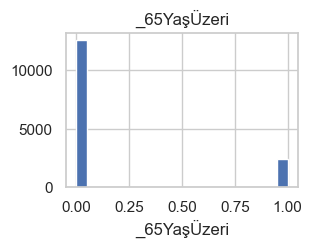

count   14980.000
mean       32.053
std        24.515
min         1.000
1%          1.000
5%          1.000
25%         8.000
50%        28.000
75%        55.000
95%        71.000
99%        72.000
max        72.000
Name: PoliçeSüresi, dtype: float64


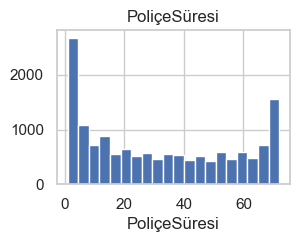

count   14980.000
mean       64.356
std        30.192
min        18.000
1%         19.000
5%         20.000
25%        35.000
50%        70.000
75%        90.000
95%       107.000
99%       115.000
max       119.000
Name: AylıkÖdemeTutarı, dtype: float64


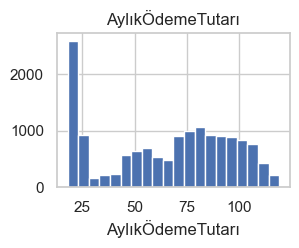

count   14980.000
mean     2292.084
std      2277.267
min        19.000
1%         20.000
5%         50.000
25%       411.000
50%      1401.000
75%      3808.750
95%      6992.000
99%      8059.000
max      8685.000
Name: ToplamÖdemeTutarı, dtype: float64


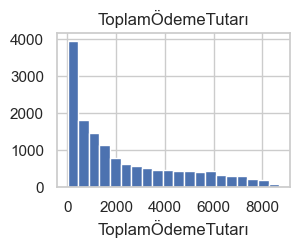

count   14980.000
mean        3.092
std         1.054
min         0.000
1%          1.000
5%          1.000
25%         2.000
50%         3.000
75%         4.000
95%         5.000
99%         5.000
max         5.000
Name: sigorta_sayısı, dtype: float64


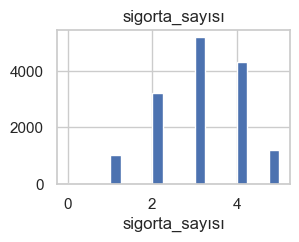

count   14980.000
mean        4.681
std        18.953
min         0.003
1%          0.012
5%          0.059
25%         0.883
50%         1.000
75%         1.258
95%        18.397
99%        81.835
max       396.150
Name: Aylık_fark_oran, dtype: float64


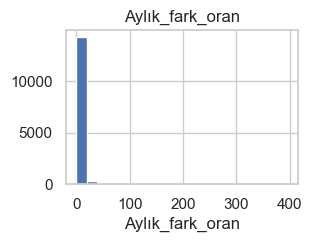

count   14980.000
mean        0.274
std         0.446
min         0.000
1%          0.000
5%          0.000
25%         0.000
50%         0.000
75%         1.000
95%         1.000
99%         1.000
max         1.000
Name: not_renew, dtype: float64


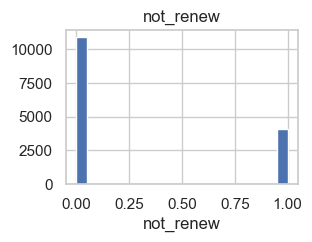

In [280]:
for col in num_cols:
    print(df[col].describe(quantiles).T)

    plt.figure(figsize=(3, 2))
    df[col].hist(bins=20)
    plt.xlabel(col)
    plt.title(col)
    plt.show()

In [281]:
num_cols

['_65YaşÜzeri',
 'PoliçeSüresi',
 'AylıkÖdemeTutarı',
 'ToplamÖdemeTutarı',
 'sigorta_sayısı',
 'Aylık_fark_oran',
 'not_renew']

## Korelasyon analizi 

In [282]:
df[num_cols].corr()

,_65YaşÜzeri,PoliçeSüresi,AylıkÖdemeTutarı,ToplamÖdemeTutarı,sigorta_sayısı,Aylık_fark_oran,not_renew
_65YaşÜzeri,1.000,0.015,0.112,0.027,0.082,-0.014,0.075
PoliçeSüresi,0.015,1.000,0.110,0.388,0.135,-0.232,-0.157
AylıkÖdemeTutarı,0.112,0.110,1.000,0.313,0.417,-0.126,0.086
ToplamÖdemeTutarı,0.027,0.388,0.313,1.000,0.304,0.217,-0.091
sigorta_sayısı,0.082,0.135,0.417,0.304,1.000,0.005,0.044
Aylık_fark_oran,-0.014,-0.232,-0.126,0.217,0.005,1.000,0.012
not_renew,0.075,-0.157,0.086,-0.091,0.044,0.012,1.000


>Poliçe süresi arttıkça yenilememe olasılığı azalıyor. Yani uzun vadeli poliçeler daha çok yenileniyor.
>
>Aylık ödemesi yüksek olanların yenilememe ihtimali hafif artıyor.
>
>65 yaş üstü müşterilerde yenilememe oranı bir miktar daha yüksek olabilir.

>AylıkÖdemeTutarı ↔ sigorta_sayısı 
Sigorta sayısı arttıkça aylık ödeme artıyor. Yani daha fazla sigortaya sahip olanların primleri daha yüksek.



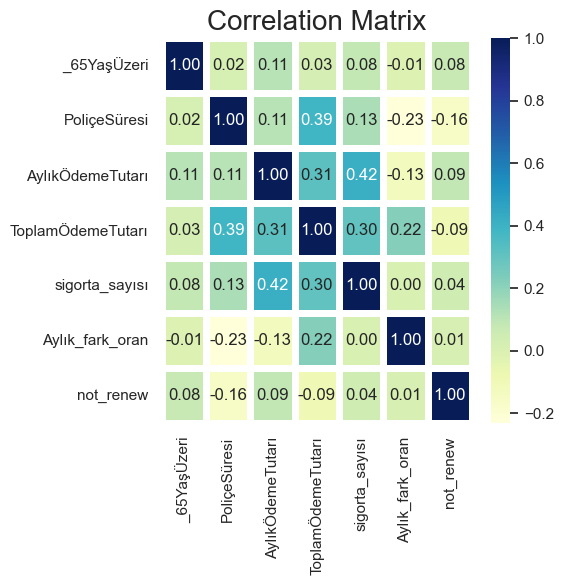

In [283]:
# Korelasyon Matrisi
f, ax = plt.subplots(figsize=[5, 5])
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", ax=ax, cmap="YlGnBu", linewidths=5)
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [284]:
# Targeta göre korelasyonlar
df[num_cols].corrwith(df["not_renew"]).sort_values(ascending=False)

not_renew            1.000
AylıkÖdemeTutarı     0.086
_65YaşÜzeri          0.075
sigorta_sayısı       0.044
Aylık_fark_oran      0.012
ToplamÖdemeTutarı   -0.091
PoliçeSüresi        -0.157
dtype: float64

In [285]:
##df.to_excel("final_13.09.xlsx", index=False)

## Base Model Kurulumu

> Herhangi bir değişken kolon eklenmeden ham hali ile modele hazırlayalım

In [286]:
!pip install catboost
!pip install lightgbm
!pip install xgboost

In [287]:
# Gerekli Kütüphane ve Fonksiyonlar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression  #1
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier     #2
from sklearn.svm import SVC

from catboost import CatBoostClassifier       #3
from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier

## Uyarilari Kaldirma
import warnings
warnings.simplefilter(action="ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 170)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.mode.chained_assignment = None 


In [288]:
dff = df_.copy()
dff.head()

,PoliçeNumarası,MüşteriCinsiyeti,_65YaşÜzeri,MedeniDurum,ÇocukVarmı,PoliçeSüresi,EvSigortasıVarlığı,AraçSigortasıVarlığı,SağlıkSigortasıVarlığı,TicariSigortaVarlığı,MobilUygulamaKullanımı,ÇağrıMerkeziİletişimi,SonTedaviDetayı,AmeliyatGeçmişi,AileHayatSigortasıVarlığı,SözleşmeTürü,BildirimTercihleri,ÖdemeYöntemi,AylıkÖdemeTutarı,ToplamÖdemeTutarı,PoliçeYenilemeDurumu
0,7590-VHVEG,Kadın,0,Evet,Hayır,1,Yok,Sigortasiz,VarStandard,Rakipte,Kullaniyor,Evet,Ayakta,Hayir,Yok,Temel Hayat Sigortası,eMail,Otomatik Ödeme Talimatı,30,30,Evet
1,5575-GNVDE,Erkek,0,Hayır,Hayır,34,Var,Rakip,VarStandard,Var,Kullanmiyor,BirdenFazla,Ayakta,Hayir,TekKisi,Özel Hayat Sigortası,Mektup,Kredi Kartı ile Taksitli Ödeme,57,1890,Negatif
2,3668-QPYBK,Erkek,0,Hayır,Hayır,2,Var,Rakip,VarStandard,Var,Kullaniyor,Evet,Ayakta,Hayir,TekKisi,Temel Hayat Sigortası,eMail,Kredi Kartı ile Taksitli Ödeme,54,108,Negatif
3,7795-CFOCW,Erkek,0,Hayır,Hayır,45,Yok,Sigortasiz,VarStandard,Var,Kullanmiyor,BirdenFazla,Yatis,Hayir,TekKisi,Özel Hayat Sigortası,Mektup,Kredi Kartı ile Taksitli Ödeme,42,1841,Negatif
4,9237-HQITU,Kadın,0,Hayır,Hayır,2,Var,Rakip,VarKapsamli,Rakipte,Kullanmiyor,Evet,Ayakta,Hayir,TekKisi,Temel Hayat Sigortası,eMail,Otomatik Ödeme Talimatı,71,152,Evet


In [289]:
cat_cols = dff.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = dff.select_dtypes(exclude=['object', 'category']).columns.tolist()

In [290]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   PoliçeNumarası             15000 non-null  object
 1   MüşteriCinsiyeti           15000 non-null  object
 2   _65YaşÜzeri                15000 non-null  int64 
 3   MedeniDurum                15000 non-null  object
 4   ÇocukVarmı                 15000 non-null  object
 5   PoliçeSüresi               15000 non-null  int64 
 6   EvSigortasıVarlığı         15000 non-null  object
 7   AraçSigortasıVarlığı       15000 non-null  object
 8   SağlıkSigortasıVarlığı     15000 non-null  object
 9   TicariSigortaVarlığı       15000 non-null  object
 10  MobilUygulamaKullanımı     15000 non-null  object
 11  ÇağrıMerkeziİletişimi      15000 non-null  object
 12  SonTedaviDetayı            15000 non-null  object
 13  AmeliyatGeçmişi            15000 non-null  object
 14  AileHa

### Outlier Detection

In [291]:
def calculate_LB_UB (dff,var):
    '''calculating upper bound and lower bound values to identify outliers'''
    Q3=np.percentile(dff[var],75)
    Q1=np.percentile(dff[var],25)
    IQR=1.5*(Q3-Q1)
    
    UB=Q3+IQR
    LB=Q1-IQR
    
    print(LB,UB)
    
    return LB,UB

In [292]:
for i in num_cols:
    print("\n name of column:", i)
    LB, UB = calculate_LB_UB(dff, i)
    print("min and max value", (dff[i].min(), dff[i].max()))
    print("range of outliers:", LB, UB)
    
    if dff[i].max() > UB or dff[i].min() < LB:
        print("----Investigate variable for outliers---")



        


 name of column: _65YaşÜzeri
0.0 0.0
min and max value (0, 1)
range of outliers: 0.0 0.0
----Investigate variable for outliers---

 name of column: PoliçeSüresi
-62.5 125.5
min and max value (0, 72)
range of outliers: -62.5 125.5

 name of column: AylıkÖdemeTutarı
-47.5 172.5
min and max value (18, 119)
range of outliers: -47.5 172.5

 name of column: ToplamÖdemeTutarı
-4687.0 8905.0
min and max value (19, 8685)
range of outliers: -4687.0 8905.0


In [293]:
dff = dff.drop(dff[dff["PoliçeSüresi"] == 0].index)
dff = dff.drop("PoliçeNumarası", axis=1)
dff["not_renew"] = dff["PoliçeYenilemeDurumu"].apply(lambda x : 1 if x == "Negatif" else 0 )

In [294]:
dff = dff.drop(["PoliçeYenilemeDurumu"], axis=1)

In [295]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14980 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   MüşteriCinsiyeti           14980 non-null  object
 1   _65YaşÜzeri                14980 non-null  int64 
 2   MedeniDurum                14980 non-null  object
 3   ÇocukVarmı                 14980 non-null  object
 4   PoliçeSüresi               14980 non-null  int64 
 5   EvSigortasıVarlığı         14980 non-null  object
 6   AraçSigortasıVarlığı       14980 non-null  object
 7   SağlıkSigortasıVarlığı     14980 non-null  object
 8   TicariSigortaVarlığı       14980 non-null  object
 9   MobilUygulamaKullanımı     14980 non-null  object
 10  ÇağrıMerkeziİletişimi      14980 non-null  object
 11  SonTedaviDetayı            14980 non-null  object
 12  AmeliyatGeçmişi            14980 non-null  object
 13  AileHayatSigortasıVarlığı  14980 non-null  object
 14  SözleşmeTür

### Categorical Variable_ get_dummies

In [296]:
cat_cols = dff.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = dff.select_dtypes(exclude=['object', 'category']).columns.tolist()

In [297]:
pd.get_dummies(dff, columns=cat_cols, drop_first=True,dtype=int).head()

,_65YaşÜzeri,PoliçeSüresi,AylıkÖdemeTutarı,ToplamÖdemeTutarı,not_renew,MüşteriCinsiyeti_Kadın,MedeniDurum_Hayır,ÇocukVarmı_Hayır,EvSigortasıVarlığı_Yok,AraçSigortasıVarlığı_Sigortasiz,AraçSigortasıVarlığı_Var,SağlıkSigortasıVarlığı_VarStandard,SağlıkSigortasıVarlığı_Yok,TicariSigortaVarlığı_TicariDegil,TicariSigortaVarlığı_Var,MobilUygulamaKullanımı_Kullanmiyor,ÇağrıMerkeziİletişimi_Evet,ÇağrıMerkeziİletişimi_Hayir,SonTedaviDetayı_Ayakta,SonTedaviDetayı_Yatis,AmeliyatGeçmişi_Hayir,AmeliyatGeçmişi_Planlanan,AileHayatSigortasıVarlığı_Var,AileHayatSigortasıVarlığı_Yok,SözleşmeTürü_Temel Hayat Sigortası,SözleşmeTürü_Özel Hayat Sigortası,BildirimTercihleri_eMail,ÖdemeYöntemi_Otomatik Ödeme Talimatı
0,0,1,30,30,0,1,0,1,1,1,0,1,0,0,0,0,1,0,1,0,1,0,0,1,1,0,1,1
1,0,34,57,1890,1,0,1,1,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0
2,0,2,54,108,1,0,1,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0
3,0,45,42,1841,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,1,1,0,0,0,0,1,0,0
4,0,2,71,152,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,1,0,1,1


In [298]:
dff = pd.get_dummies(dff, columns=cat_cols, drop_first=True)

In [299]:
dff.head()

,_65YaşÜzeri,PoliçeSüresi,AylıkÖdemeTutarı,ToplamÖdemeTutarı,not_renew,MüşteriCinsiyeti_Kadın,MedeniDurum_Hayır,ÇocukVarmı_Hayır,EvSigortasıVarlığı_Yok,AraçSigortasıVarlığı_Sigortasiz,AraçSigortasıVarlığı_Var,SağlıkSigortasıVarlığı_VarStandard,SağlıkSigortasıVarlığı_Yok,TicariSigortaVarlığı_TicariDegil,TicariSigortaVarlığı_Var,MobilUygulamaKullanımı_Kullanmiyor,ÇağrıMerkeziİletişimi_Evet,ÇağrıMerkeziİletişimi_Hayir,SonTedaviDetayı_Ayakta,SonTedaviDetayı_Yatis,AmeliyatGeçmişi_Hayir,AmeliyatGeçmişi_Planlanan,AileHayatSigortasıVarlığı_Var,AileHayatSigortasıVarlığı_Yok,SözleşmeTürü_Temel Hayat Sigortası,SözleşmeTürü_Özel Hayat Sigortası,BildirimTercihleri_eMail,ÖdemeYöntemi_Otomatik Ödeme Talimatı
0,0,1,30,30,0,True,False,True,True,True,False,True,False,False,False,False,True,False,True,False,True,False,False,True,True,False,True,True
1,0,34,57,1890,1,False,True,True,False,False,False,True,False,False,True,True,False,False,True,False,True,False,False,False,False,True,False,False
2,0,2,54,108,1,False,True,True,False,False,False,True,False,False,True,False,True,False,True,False,True,False,False,False,True,False,True,False
3,0,45,42,1841,1,False,True,True,True,True,False,True,False,False,True,True,False,False,False,True,True,False,False,False,False,True,False,False
4,0,2,71,152,0,True,True,True,False,False,False,False,False,False,False,True,True,False,True,False,True,False,False,False,True,False,True,True


In [300]:
dff = dff.astype(int)

In [301]:
y = dff["not_renew"]
X = dff.drop(["not_renew"], axis=1)

In [302]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

### Catboost_model

In [303]:
catboost_model = CatBoostClassifier(verbose=False, random_state=12345).fit(X_train, y_train)
y_pred = catboost_model.predict(X_test)

In [304]:
print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 2)}")
print(f"Recall: {round(recall_score(y_pred,y_test),2)}")
print(f"Precision: {round(precision_score(y_pred,y_test), 2)}")
print(f"F1: {round(f1_score(y_pred,y_test), 2)}")
#print(f"Auc: {round(roc_auc_score(y_pred,y_test), 2)}")
print(classification_report(y_pred, y_test))

Accuracy: 0.75
Recall: 0.62
Precision: 0.22
F1: 0.33
              precision    recall  f1-score   support

           0       0.95      0.76      0.85      4060
           1       0.22      0.62      0.33       434

    accuracy                           0.75      4494
   macro avg       0.59      0.69      0.59      4494
weighted avg       0.88      0.75      0.80      4494



In [305]:
def plot_importance(model, features, num=len(X)):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()

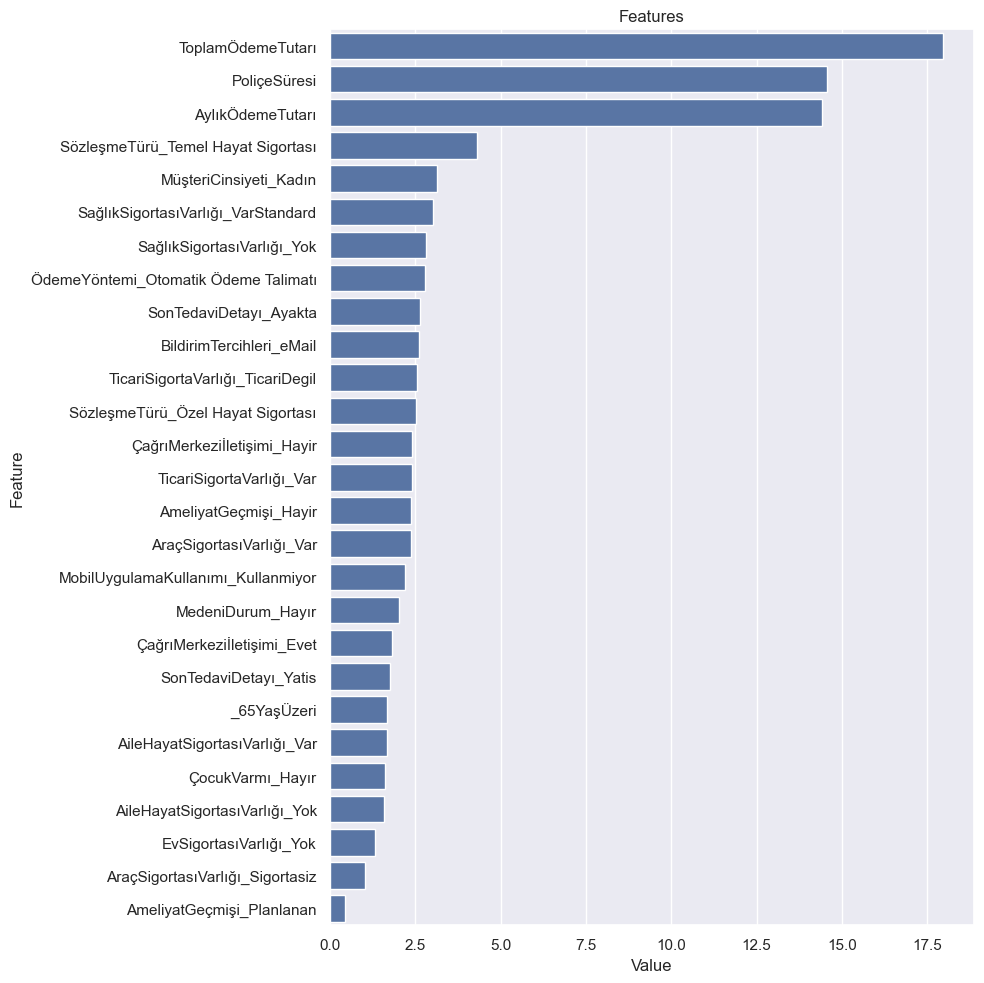

In [306]:
plot_importance(catboost_model, X)

### Log Regression

In [307]:
log_model = LogisticRegression(max_iter=1000)

In [308]:
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [309]:
y_pred_log = log_model.predict(X_test)

In [310]:
print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 4)}")
print(f"Recall: {round(recall_score(y_pred,y_test),4)}")
print(f"Precision: {round(precision_score(y_pred,y_test), 4)}")
print(f"F1: {round(f1_score(y_pred,y_test), 4)}")
#print(f"Auc: {round(roc_auc_score(y_pred,y_test), 4)}")
print(classification_report(y_pred, y_test))

Accuracy: 0.7506
Recall: 0.6244
Precision: 0.2205
F1: 0.3259
              precision    recall  f1-score   support

           0       0.95      0.76      0.85      4060
           1       0.22      0.62      0.33       434

    accuracy                           0.75      4494
   macro avg       0.59      0.69      0.59      4494
weighted avg       0.88      0.75      0.80      4494



### Random Forest

In [311]:
rf_model = RandomForestClassifier(random_state=23).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [312]:
print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 2)}")
print(f"Recall: {round(recall_score(y_pred,y_test),2)}")
print(f"Precision: {round(precision_score(y_pred,y_test), 2)}")
print(f"F1: {round(f1_score(y_pred,y_test), 2)}")
#print(f"Auc: {round(roc_auc_score(y_pred,y_test), 2)}")
print(classification_report(y_pred, y_test))

Accuracy: 0.75
Recall: 0.63
Precision: 0.2
F1: 0.3
              precision    recall  f1-score   support

           0       0.96      0.76      0.85      4101
           1       0.20      0.63      0.30       393

    accuracy                           0.75      4494
   macro avg       0.58      0.69      0.58      4494
weighted avg       0.89      0.75      0.80      4494



## MODEL IMPROVEMENT : Feature Extraction

In [313]:
dfm= df.copy()

In [314]:
dfm.head()

,MüşteriCinsiyeti,_65YaşÜzeri,MedeniDurum,ÇocukVarmı,PoliçeSüresi,EvSigortasıVarlığı,AraçSigortasıVarlığı,SağlıkSigortasıVarlığı,TicariSigortaVarlığı,MobilUygulamaKullanımı,ÇağrıMerkeziİletişimi,SonTedaviDetayı,AmeliyatGeçmişi,AileHayatSigortasıVarlığı,SözleşmeTürü,BildirimTercihleri,ÖdemeYöntemi,AylıkÖdemeTutarı,ToplamÖdemeTutarı,aile_segment,sigorta_sayısı,sigorta_profili,Aylık_fark_oran,FarkSegment,not_renew
0,Kadın,0,Evet,Hayır,1,Yok,Sigortasiz,VarStandard,Rakipte,Kullaniyor,Evet,Ayakta,Hayır,Yok,Temel Hayat Sigortası,eMail,Otomatik Ödeme Talimatı,30,30,evli+çocuksuz,1,Sağlık,1.000,Uygun,0
1,Erkek,0,Hayır,Hayır,34,Var,Rakip,VarStandard,Var,Kullanmiyor,BirdenFazla,Ayakta,Hayır,TekKisi,Özel Hayat Sigortası,Mektup,Kredi Kartı ile Taksitli Ödeme,57,1890,bekar+çocuksuz,4,Ev+Sağlık+TicariSigorta+AileHayat,0.975,İndirim/Kampanya,1
2,Erkek,0,Hayır,Hayır,2,Var,Rakip,VarStandard,Var,Kullaniyor,Evet,Ayakta,Hayır,TekKisi,Temel Hayat Sigortası,eMail,Kredi Kartı ile Taksitli Ödeme,54,108,bekar+çocuksuz,4,Ev+Sağlık+TicariSigorta+AileHayat,1.000,Uygun,1
3,Erkek,0,Hayır,Hayır,45,Yok,Sigortasiz,VarStandard,Var,Kullanmiyor,BirdenFazla,Yatis,Hayır,TekKisi,Özel Hayat Sigortası,Mektup,Kredi Kartı ile Taksitli Ödeme,42,1841,bekar+çocuksuz,3,Sağlık+TicariSigorta+AileHayat,0.974,İndirim/Kampanya,1
4,Kadın,0,Hayır,Hayır,2,Var,Rakip,VarKapsamli,Rakipte,Kullanmiyor,Evet,Ayakta,Hayır,TekKisi,Temel Hayat Sigortası,eMail,Otomatik Ödeme Talimatı,71,152,bekar+çocuksuz,3,Ev+Sağlık+AileHayat,1.070,Ek Prim,0


In [315]:
cat_cols = dfm.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = dfm.select_dtypes(exclude=['object', 'category']).columns.tolist()

In [316]:
def calculate_LB_UB (dfm,var):
    '''calculating upper bound and lower bound values to identify outliers'''
    Q3=np.percentile(dfm[var],75)
    Q1=np.percentile(dfm[var],25)
    IQR=1.5*(Q3-Q1)
    
    UB=Q3+IQR
    LB=Q1-IQR
    
    print(LB,UB)
    
    return LB,UB

In [317]:
for i in num_cols:
    print("\n name of column:", i)
    LB, UB = calculate_LB_UB(dfm, i)
    print("min and max value", (dfm[i].min(), dfm[i].max()))
    print("range of outliers:", LB, UB)
    
    if dfm[i].max() > UB or dfm[i].min() < LB:
        print("----Investigate variable for outliers---")





 name of column: _65YaşÜzeri
0.0 0.0
min and max value (0, 1)
range of outliers: 0.0 0.0
----Investigate variable for outliers---

 name of column: PoliçeSüresi
-62.5 125.5
min and max value (1, 72)
range of outliers: -62.5 125.5

 name of column: AylıkÖdemeTutarı
-47.5 172.5
min and max value (18, 119)
range of outliers: -47.5 172.5

 name of column: ToplamÖdemeTutarı
-4685.625 8905.375
min and max value (19, 8685)
range of outliers: -4685.625 8905.375

 name of column: sigorta_sayısı
-1.0 7.0
min and max value (0, 5)
range of outliers: -1.0 7.0

 name of column: Aylık_fark_oran
0.3198031777354914 1.8213021362066135
min and max value (0.0025319829424307037, 396.15)
range of outliers: 0.3198031777354914 1.8213021362066135
----Investigate variable for outliers---

 name of column: not_renew
-1.5 2.5
min and max value (0, 1)
range of outliers: -1.5 2.5


In [318]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14980 entries, 0 to 14999
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   MüşteriCinsiyeti           14980 non-null  object 
 1   _65YaşÜzeri                14980 non-null  int64  
 2   MedeniDurum                14980 non-null  object 
 3   ÇocukVarmı                 14980 non-null  object 
 4   PoliçeSüresi               14980 non-null  int64  
 5   EvSigortasıVarlığı         14980 non-null  object 
 6   AraçSigortasıVarlığı       14980 non-null  object 
 7   SağlıkSigortasıVarlığı     14980 non-null  object 
 8   TicariSigortaVarlığı       14980 non-null  object 
 9   MobilUygulamaKullanımı     14980 non-null  object 
 10  ÇağrıMerkeziİletişimi      14980 non-null  object 
 11  SonTedaviDetayı            14980 non-null  object 
 12  AmeliyatGeçmişi            14980 non-null  object 
 13  AileHayatSigortasıVarlığı  14980 non-null  object 


In [319]:
# Tenure  değişkeninden yıllık kategorik değişken oluşturma

dfm.loc[(dfm["PoliçeSüresi"]>=0) & (dfm["PoliçeSüresi"]<=12),"NEW_TENURE_YEAR"] = "0-1 Year"
dfm.loc[(dfm["PoliçeSüresi"]>12) & (dfm["PoliçeSüresi"]<=24),"NEW_TENURE_YEAR"] = "1-2 Year"
dfm.loc[(dfm["PoliçeSüresi"]>24) & (dfm["PoliçeSüresi"]<=36),"NEW_TENURE_YEAR"] = "2-3 Year"
dfm.loc[(dfm["PoliçeSüresi"]>36) & (dfm["PoliçeSüresi"]<=48),"NEW_TENURE_YEAR"] = "3-4 Year"
dfm.loc[(dfm["PoliçeSüresi"]>48) & (dfm["PoliçeSüresi"]<=60),"NEW_TENURE_YEAR"] = "4-5 Year"
dfm.loc[(dfm["PoliçeSüresi"]>60) & (dfm["PoliçeSüresi"]<=72),"NEW_TENURE_YEAR"] = "5-6 Year"

In [320]:
# poliçe süresi 1 veya 2 yıllık müşterileri Engaged olarak belirtme
dfm["NEW_Engaged"] = dfm["NEW_TENURE_YEAR"].apply(lambda x: 1 if x in ["0-1 Year","1-2 Year"] else 0)

In [321]:
# New engaged olmayan  ve genç olan müşteriler
dfm["Young_Not_New_Engaged"] = dfm.apply(lambda x: 1 if (x["NEW_Engaged"] == 0) and (x["_65YaşÜzeri"] == 0) else 0, axis=1)

In [322]:
##dfm.to_excel("23.09_data.xlsx", index=False, engine="openpyxl")

##print("Veri başarıyla Excel'e aktarıldı!")

In [323]:
##dfm = dfm.drop(["sigorta_profili","Aylık_fark_oran","aile_segment"], axis=1)


In [324]:
cat_cols = dfm.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = dfm.select_dtypes(exclude=['object', 'category']).columns.tolist()

In [325]:
dfm[cat_cols].head()

,MüşteriCinsiyeti,MedeniDurum,ÇocukVarmı,EvSigortasıVarlığı,AraçSigortasıVarlığı,SağlıkSigortasıVarlığı,TicariSigortaVarlığı,MobilUygulamaKullanımı,ÇağrıMerkeziİletişimi,SonTedaviDetayı,AmeliyatGeçmişi,AileHayatSigortasıVarlığı,SözleşmeTürü,BildirimTercihleri,ÖdemeYöntemi,aile_segment,sigorta_profili,FarkSegment,NEW_TENURE_YEAR
0,Kadın,Evet,Hayır,Yok,Sigortasiz,VarStandard,Rakipte,Kullaniyor,Evet,Ayakta,Hayır,Yok,Temel Hayat Sigortası,eMail,Otomatik Ödeme Talimatı,evli+çocuksuz,Sağlık,Uygun,0-1 Year
1,Erkek,Hayır,Hayır,Var,Rakip,VarStandard,Var,Kullanmiyor,BirdenFazla,Ayakta,Hayır,TekKisi,Özel Hayat Sigortası,Mektup,Kredi Kartı ile Taksitli Ödeme,bekar+çocuksuz,Ev+Sağlık+TicariSigorta+AileHayat,İndirim/Kampanya,2-3 Year
2,Erkek,Hayır,Hayır,Var,Rakip,VarStandard,Var,Kullaniyor,Evet,Ayakta,Hayır,TekKisi,Temel Hayat Sigortası,eMail,Kredi Kartı ile Taksitli Ödeme,bekar+çocuksuz,Ev+Sağlık+TicariSigorta+AileHayat,Uygun,0-1 Year
3,Erkek,Hayır,Hayır,Yok,Sigortasiz,VarStandard,Var,Kullanmiyor,BirdenFazla,Yatis,Hayır,TekKisi,Özel Hayat Sigortası,Mektup,Kredi Kartı ile Taksitli Ödeme,bekar+çocuksuz,Sağlık+TicariSigorta+AileHayat,İndirim/Kampanya,3-4 Year
4,Kadın,Hayır,Hayır,Var,Rakip,VarKapsamli,Rakipte,Kullanmiyor,Evet,Ayakta,Hayır,TekKisi,Temel Hayat Sigortası,eMail,Otomatik Ödeme Talimatı,bekar+çocuksuz,Ev+Sağlık+AileHayat,Ek Prim,0-1 Year


In [326]:
pd.get_dummies(dfm, columns=cat_cols, drop_first=True,dtype=int).head()

,_65YaşÜzeri,PoliçeSüresi,AylıkÖdemeTutarı,ToplamÖdemeTutarı,sigorta_sayısı,Aylık_fark_oran,not_renew,NEW_Engaged,Young_Not_New_Engaged,MüşteriCinsiyeti_Kadın,MedeniDurum_Hayır,ÇocukVarmı_Hayır,EvSigortasıVarlığı_Yok,AraçSigortasıVarlığı_Sigortasiz,AraçSigortasıVarlığı_Var,SağlıkSigortasıVarlığı_VarStandard,SağlıkSigortasıVarlığı_Yok,TicariSigortaVarlığı_TicariDegil,TicariSigortaVarlığı_Var,MobilUygulamaKullanımı_Kullanmiyor,ÇağrıMerkeziİletişimi_Evet,ÇağrıMerkeziİletişimi_Hayır,SonTedaviDetayı_Ayakta,SonTedaviDetayı_Yatis,AmeliyatGeçmişi_Hayır,AmeliyatGeçmişi_Planlanan,AileHayatSigortasıVarlığı_Var,AileHayatSigortasıVarlığı_Yok,SözleşmeTürü_Temel Hayat Sigortası,SözleşmeTürü_Özel Hayat Sigortası,BildirimTercihleri_eMail,ÖdemeYöntemi_Otomatik Ödeme Talimatı,aile_segment_bekar+çocuksuz,aile_segment_evli+çocuklu,aile_segment_evli+çocuksuz,sigorta_profili_Araç,sigorta_profili_Araç+AileHayat,sigorta_profili_Araç+Sağlık,sigorta_profili_Araç+Sağlık+AileHayat,sigorta_profili_Araç+Sağlık+TicariSigorta,sigorta_profili_Araç+Sağlık+TicariSigorta+AileHayat,sigorta_profili_Araç+TicariSigorta,sigorta_profili_Araç+TicariSigorta+AileHayat,sigorta_profili_Ev,sigorta_profili_Ev+AileHayat,sigorta_profili_Ev+Araç,sigorta_profili_Ev+Araç+AileHayat,sigorta_profili_Ev+Araç+Sağlık,sigorta_profili_Ev+Araç+Sağlık+AileHayat,sigorta_profili_Ev+Araç+Sağlık+TicariSigorta,sigorta_profili_Ev+Araç+Sağlık+TicariSigorta+AileHayat,sigorta_profili_Ev+Araç+TicariSigorta,sigorta_profili_Ev+Araç+TicariSigorta+AileHayat,sigorta_profili_Ev+Sağlık,sigorta_profili_Ev+Sağlık+AileHayat,sigorta_profili_Ev+Sağlık+TicariSigorta,sigorta_profili_Ev+Sağlık+TicariSigorta+AileHayat,sigorta_profili_Ev+TicariSigorta,sigorta_profili_Ev+TicariSigorta+AileHayat,sigorta_profili_Sağlık,sigorta_profili_Sağlık+AileHayat,sigorta_profili_Sağlık+TicariSigorta,sigorta_profili_Sağlık+TicariSigorta+AileHayat,sigorta_profili_TicariSigorta,sigorta_profili_TicariSigorta+AileHayat,sigorta_profili_Yok,FarkSegment_Uygun,FarkSegment_İndirim/Kampanya,NEW_TENURE_YEAR_1-2 Year,NEW_TENURE_YEAR_2-3 Year,NEW_TENURE_YEAR_3-4 Year,NEW_TENURE_YEAR_4-5 Year,NEW_TENURE_YEAR_5-6 Year
0,0,1,30,30,1,1.000,0,1,0,1,0,1,1,1,0,1,0,0,0,0,1,0,1,0,1,0,0,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,34,57,1890,4,0.975,1,0,1,0,1,1,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
2,0,2,54,108,4,1.000,1,1,0,0,1,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,45,42,1841,3,0.974,1,0,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
4,0,2,71,152,3,1.070,0,1,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [327]:
dfm = pd.get_dummies(dfm, columns=cat_cols, drop_first=True)

In [328]:
dfm.head()

,_65YaşÜzeri,PoliçeSüresi,AylıkÖdemeTutarı,ToplamÖdemeTutarı,sigorta_sayısı,Aylık_fark_oran,not_renew,NEW_Engaged,Young_Not_New_Engaged,MüşteriCinsiyeti_Kadın,MedeniDurum_Hayır,ÇocukVarmı_Hayır,EvSigortasıVarlığı_Yok,AraçSigortasıVarlığı_Sigortasiz,AraçSigortasıVarlığı_Var,SağlıkSigortasıVarlığı_VarStandard,SağlıkSigortasıVarlığı_Yok,TicariSigortaVarlığı_TicariDegil,TicariSigortaVarlığı_Var,MobilUygulamaKullanımı_Kullanmiyor,ÇağrıMerkeziİletişimi_Evet,ÇağrıMerkeziİletişimi_Hayır,SonTedaviDetayı_Ayakta,SonTedaviDetayı_Yatis,AmeliyatGeçmişi_Hayır,AmeliyatGeçmişi_Planlanan,AileHayatSigortasıVarlığı_Var,AileHayatSigortasıVarlığı_Yok,SözleşmeTürü_Temel Hayat Sigortası,SözleşmeTürü_Özel Hayat Sigortası,BildirimTercihleri_eMail,ÖdemeYöntemi_Otomatik Ödeme Talimatı,aile_segment_bekar+çocuksuz,aile_segment_evli+çocuklu,aile_segment_evli+çocuksuz,sigorta_profili_Araç,sigorta_profili_Araç+AileHayat,sigorta_profili_Araç+Sağlık,sigorta_profili_Araç+Sağlık+AileHayat,sigorta_profili_Araç+Sağlık+TicariSigorta,sigorta_profili_Araç+Sağlık+TicariSigorta+AileHayat,sigorta_profili_Araç+TicariSigorta,sigorta_profili_Araç+TicariSigorta+AileHayat,sigorta_profili_Ev,sigorta_profili_Ev+AileHayat,sigorta_profili_Ev+Araç,sigorta_profili_Ev+Araç+AileHayat,sigorta_profili_Ev+Araç+Sağlık,sigorta_profili_Ev+Araç+Sağlık+AileHayat,sigorta_profili_Ev+Araç+Sağlık+TicariSigorta,sigorta_profili_Ev+Araç+Sağlık+TicariSigorta+AileHayat,sigorta_profili_Ev+Araç+TicariSigorta,sigorta_profili_Ev+Araç+TicariSigorta+AileHayat,sigorta_profili_Ev+Sağlık,sigorta_profili_Ev+Sağlık+AileHayat,sigorta_profili_Ev+Sağlık+TicariSigorta,sigorta_profili_Ev+Sağlık+TicariSigorta+AileHayat,sigorta_profili_Ev+TicariSigorta,sigorta_profili_Ev+TicariSigorta+AileHayat,sigorta_profili_Sağlık,sigorta_profili_Sağlık+AileHayat,sigorta_profili_Sağlık+TicariSigorta,sigorta_profili_Sağlık+TicariSigorta+AileHayat,sigorta_profili_TicariSigorta,sigorta_profili_TicariSigorta+AileHayat,sigorta_profili_Yok,FarkSegment_Uygun,FarkSegment_İndirim/Kampanya,NEW_TENURE_YEAR_1-2 Year,NEW_TENURE_YEAR_2-3 Year,NEW_TENURE_YEAR_3-4 Year,NEW_TENURE_YEAR_4-5 Year,NEW_TENURE_YEAR_5-6 Year
0,0,1,30,30,1,1.000,0,1,0,True,False,True,True,True,False,True,False,False,False,False,True,False,True,False,True,False,False,True,True,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False
1,0,34,57,1890,4,0.975,1,0,1,False,True,True,False,False,False,True,False,False,True,True,False,False,True,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False
2,0,2,54,108,4,1.000,1,1,0,False,True,True,False,False,False,True,False,False,True,False,True,False,True,False,True,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
3,0,45,42,1841,3,0.974,1,0,1,False,True,True,True,True,False,True,False,False,True,True,False,False,False,True,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False
4,0,2,71,152,3,1.070,0,1,0,True,True,True,False,False,False,False,False,False,False,True,True,False,True,False,True,False,False,False,True,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fal

In [329]:
dfm = dfm.astype(int)

In [330]:
dfm.head()

,_65YaşÜzeri,PoliçeSüresi,AylıkÖdemeTutarı,ToplamÖdemeTutarı,sigorta_sayısı,Aylık_fark_oran,not_renew,NEW_Engaged,Young_Not_New_Engaged,MüşteriCinsiyeti_Kadın,MedeniDurum_Hayır,ÇocukVarmı_Hayır,EvSigortasıVarlığı_Yok,AraçSigortasıVarlığı_Sigortasiz,AraçSigortasıVarlığı_Var,SağlıkSigortasıVarlığı_VarStandard,SağlıkSigortasıVarlığı_Yok,TicariSigortaVarlığı_TicariDegil,TicariSigortaVarlığı_Var,MobilUygulamaKullanımı_Kullanmiyor,ÇağrıMerkeziİletişimi_Evet,ÇağrıMerkeziİletişimi_Hayır,SonTedaviDetayı_Ayakta,SonTedaviDetayı_Yatis,AmeliyatGeçmişi_Hayır,AmeliyatGeçmişi_Planlanan,AileHayatSigortasıVarlığı_Var,AileHayatSigortasıVarlığı_Yok,SözleşmeTürü_Temel Hayat Sigortası,SözleşmeTürü_Özel Hayat Sigortası,BildirimTercihleri_eMail,ÖdemeYöntemi_Otomatik Ödeme Talimatı,aile_segment_bekar+çocuksuz,aile_segment_evli+çocuklu,aile_segment_evli+çocuksuz,sigorta_profili_Araç,sigorta_profili_Araç+AileHayat,sigorta_profili_Araç+Sağlık,sigorta_profili_Araç+Sağlık+AileHayat,sigorta_profili_Araç+Sağlık+TicariSigorta,sigorta_profili_Araç+Sağlık+TicariSigorta+AileHayat,sigorta_profili_Araç+TicariSigorta,sigorta_profili_Araç+TicariSigorta+AileHayat,sigorta_profili_Ev,sigorta_profili_Ev+AileHayat,sigorta_profili_Ev+Araç,sigorta_profili_Ev+Araç+AileHayat,sigorta_profili_Ev+Araç+Sağlık,sigorta_profili_Ev+Araç+Sağlık+AileHayat,sigorta_profili_Ev+Araç+Sağlık+TicariSigorta,sigorta_profili_Ev+Araç+Sağlık+TicariSigorta+AileHayat,sigorta_profili_Ev+Araç+TicariSigorta,sigorta_profili_Ev+Araç+TicariSigorta+AileHayat,sigorta_profili_Ev+Sağlık,sigorta_profili_Ev+Sağlık+AileHayat,sigorta_profili_Ev+Sağlık+TicariSigorta,sigorta_profili_Ev+Sağlık+TicariSigorta+AileHayat,sigorta_profili_Ev+TicariSigorta,sigorta_profili_Ev+TicariSigorta+AileHayat,sigorta_profili_Sağlık,sigorta_profili_Sağlık+AileHayat,sigorta_profili_Sağlık+TicariSigorta,sigorta_profili_Sağlık+TicariSigorta+AileHayat,sigorta_profili_TicariSigorta,sigorta_profili_TicariSigorta+AileHayat,sigorta_profili_Yok,FarkSegment_Uygun,FarkSegment_İndirim/Kampanya,NEW_TENURE_YEAR_1-2 Year,NEW_TENURE_YEAR_2-3 Year,NEW_TENURE_YEAR_3-4 Year,NEW_TENURE_YEAR_4-5 Year,NEW_TENURE_YEAR_5-6 Year
0,0,1,30,30,1,1,0,1,0,1,0,1,1,1,0,1,0,0,0,0,1,0,1,0,1,0,0,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,34,57,1890,4,0,1,0,1,0,1,1,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
2,0,2,54,108,4,1,1,1,0,0,1,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,45,42,1841,3,0,1,0,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
4,0,2,71,152,3,1,0,1,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [331]:
y = dfm["not_renew"]
X = dfm.drop(["not_renew"], axis=1)

In [332]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

In [333]:
dfm.columns[dfm.columns.duplicated()]

Index([], dtype='object')

In [334]:
dfm.dtypes

_65YaşÜzeri                                               int64
PoliçeSüresi                                              int64
AylıkÖdemeTutarı                                          int64
ToplamÖdemeTutarı                                         int64
sigorta_sayısı                                            int64
Aylık_fark_oran                                           int64
not_renew                                                 int64
NEW_Engaged                                               int64
Young_Not_New_Engaged                                     int64
MüşteriCinsiyeti_Kadın                                    int64
MedeniDurum_Hayır                                         int64
ÇocukVarmı_Hayır                                          int64
EvSigortasıVarlığı_Yok                                    int64
AraçSigortasıVarlığı_Sigortasiz                           int64
AraçSigortasıVarlığı_Var                                  int64
SağlıkSigortasıVarlığı_VarStandard      

### Catboost_model

In [335]:
catboost_model = CatBoostClassifier(verbose=False, random_state=12345).fit(X_train, y_train)
y_pred = catboost_model.predict(X_test)

In [336]:
print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 2)}")
print(f"Recall: {round(recall_score(y_pred,y_test),2)}")
print(f"Precision: {round(precision_score(y_pred,y_test), 2)}")
print(f"F1: {round(f1_score(y_pred,y_test), 2)}")
#print(f"Auc: {round(roc_auc_score(y_pred,y_test), 2)}")
print(classification_report(y_pred, y_test))

Accuracy: 0.75
Recall: 0.63
Precision: 0.23
F1: 0.34
              precision    recall  f1-score   support

           0       0.95      0.77      0.85      4051
           1       0.23      0.63      0.34       443

    accuracy                           0.75      4494
   macro avg       0.59      0.70      0.59      4494
weighted avg       0.88      0.75      0.80      4494



In [337]:


catboost_model = CatBoostClassifier(verbose=False, random_state=12345)
catboost_model.fit(X_train, y_train)

y_pred = catboost_model.predict(X_test)

print(f"Accuracy: {round(accuracy_score(y_test, y_pred), 2)}")
print(f"Recall: {round(recall_score(y_test, y_pred), 2)}")
print(f"Precision: {round(precision_score(y_test, y_pred), 2)}")
print(f"F1: {round(f1_score(y_test, y_pred), 2)}")

# AUC için predict_proba kullanmalısın
y_prob = catboost_model.predict_proba(X_test)[:, 1]
print(f"AUC: {round(roc_auc_score(y_test, y_prob), 2)}")

print(classification_report(y_test, y_pred))

Accuracy: 0.75
Recall: 0.23
Precision: 0.63
F1: 0.34
AUC: 0.68
              precision    recall  f1-score   support

           0       0.77      0.95      0.85      3265
           1       0.63      0.23      0.34      1229

    accuracy                           0.75      4494
   macro avg       0.70      0.59      0.59      4494
weighted avg       0.73      0.75      0.71      4494



In [338]:
def plot_importance(model, features, num=len(X)):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()

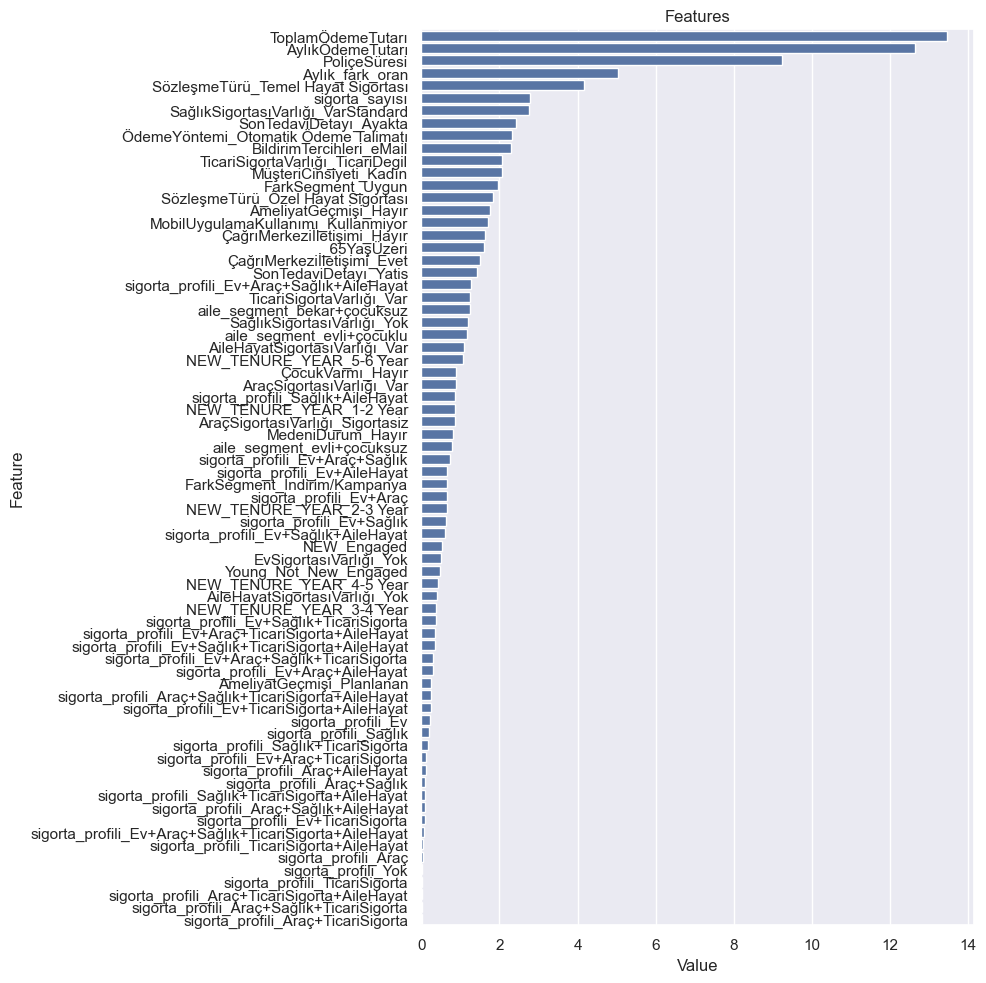

In [339]:
plot_importance(catboost_model, X)

### Log Regression

In [340]:
log_model = LogisticRegression(max_iter=1000)

In [341]:
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [342]:
y_pred_log = log_model.predict(X_test)

In [343]:
print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 4)}")
print(f"Recall: {round(recall_score(y_pred,y_test),4)}")
print(f"Precision: {round(precision_score(y_pred,y_test), 4)}")
print(f"F1: {round(f1_score(y_pred,y_test), 4)}")
#print(f"Auc: {round(roc_auc_score(y_pred,y_test), 4)}")
print(classification_report(y_pred, y_test))

Accuracy: 0.753
Recall: 0.6343
Precision: 0.2286
F1: 0.3361
              precision    recall  f1-score   support

           0       0.95      0.77      0.85      4051
           1       0.23      0.63      0.34       443

    accuracy                           0.75      4494
   macro avg       0.59      0.70      0.59      4494
weighted avg       0.88      0.75      0.80      4494



### Random Forest

In [344]:
rf_model = RandomForestClassifier(random_state=23).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [345]:
print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 2)}")
print(f"Recall: {round(recall_score(y_pred,y_test),2)}")
print(f"Precision: {round(precision_score(y_pred,y_test), 2)}")
print(f"F1: {round(f1_score(y_pred,y_test), 2)}")
#print(f"Auc: {round(roc_auc_score(y_pred,y_test), 2)}")
print(classification_report(y_pred, y_test))

Accuracy: 0.75
Recall: 0.61
Precision: 0.19
F1: 0.29
              precision    recall  f1-score   support

           0       0.95      0.76      0.85      4110
           1       0.19      0.61      0.29       384

    accuracy                           0.75      4494
   macro avg       0.57      0.69      0.57      4494
weighted avg       0.89      0.75      0.80      4494



##  Hyperparameter optimization

### Random Forest

In [346]:
rf_model = RandomForestClassifier(random_state=17)

rf_params = {"max_depth": [8, 10, None],
             "max_features": [10, 15, 20],
             "min_samples_split": [2,10],
             "n_estimators": [100]} 

In [347]:
rf_best_grid = GridSearchCV(rf_model, rf_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [348]:
rf_best_grid.best_params_

{'max_depth': None,
 'max_features': 15,
 'min_samples_split': 10,
 'n_estimators': 100}

In [349]:
rf_final = rf_model.set_params(**rf_best_grid.best_params_, random_state=17).fit(X, y)

In [350]:
y_pred = rf_final.predict(X_test)

In [351]:
print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 2)}")
print(f"Recall: {round(recall_score(y_pred,y_test),2)}")
print(f"Precision: {round(precision_score(y_pred,y_test), 2)}")
print(f"F1: {round(f1_score(y_pred,y_test), 2)}")
#print(f"Auc: {round(roc_auc_score(y_pred,y_test), 2)}")
print(classification_report(y_pred, y_test))

Accuracy: 0.89
Recall: 0.95
Precision: 0.64
F1: 0.77
              precision    recall  f1-score   support

           0       0.99      0.88      0.93      3661
           1       0.64      0.95      0.77       833

    accuracy                           0.89      4494
   macro avg       0.81      0.91      0.85      4494
weighted avg       0.92      0.89      0.90      4494



In [352]:
def plot_importance(model, features, num=None, show_table=False):
    feature_imp = pd.DataFrame({
        'Feature': features.columns,
        'Value': model.feature_importances_
    })

    if num is None:
        num = len(feature_imp)

    # Çizim
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(
        x="Value",
        y="Feature",
        data=feature_imp.sort_values(by="Value", ascending=False)[0:num]
    )
    plt.title('Features')
    plt.tight_layout()
    plt.show()

    # Eğer tablo da görmek istersek index olmadan döndür
    if show_table:
        print(feature_imp.sort_values(by="Value", ascending=False)[0:num]
              .to_string(index=False))

    return feature_imp.sort_values(by="Value", ascending=False)[0:num]

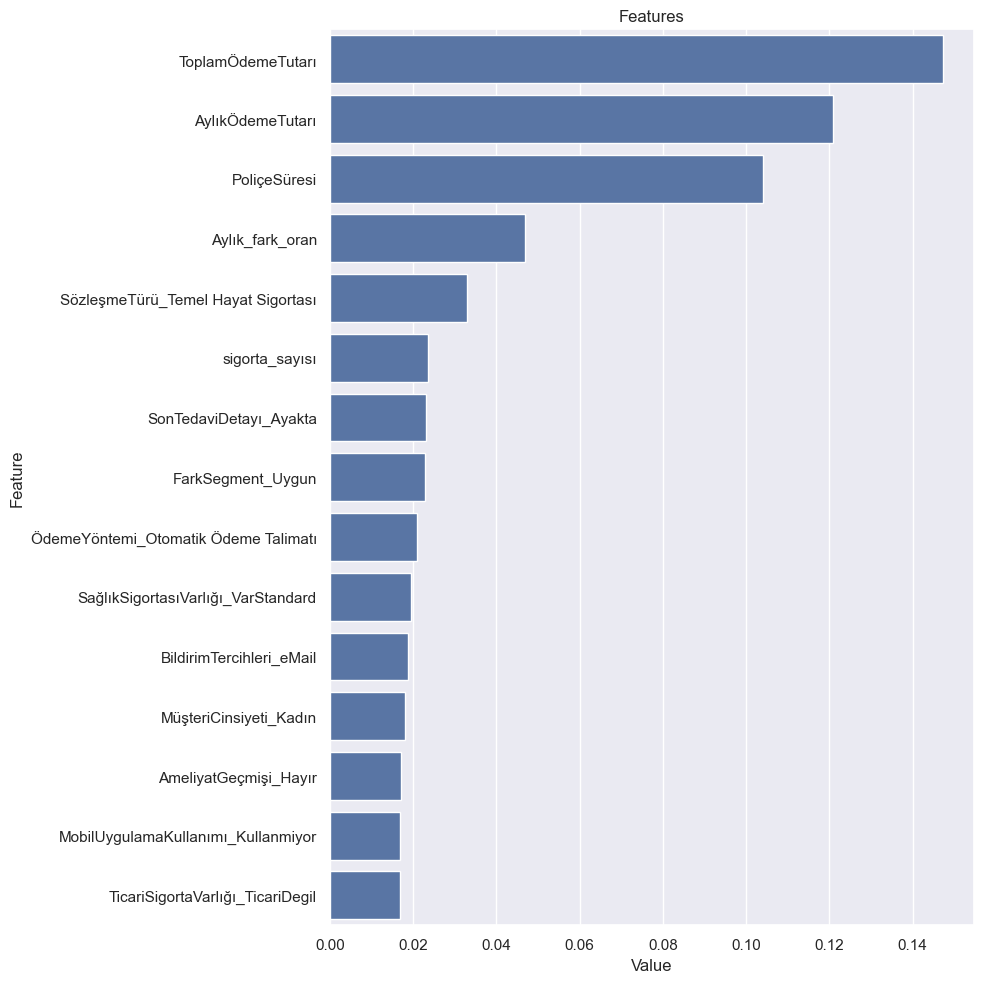

                             Feature  Value
                   ToplamÖdemeTutarı  0.147
                    AylıkÖdemeTutarı  0.121
                        PoliçeSüresi  0.104
                     Aylık_fark_oran  0.047
  SözleşmeTürü_Temel Hayat Sigortası  0.033
                      sigorta_sayısı  0.024
              SonTedaviDetayı_Ayakta  0.023
                   FarkSegment_Uygun  0.023
ÖdemeYöntemi_Otomatik Ödeme Talimatı  0.021
  SağlıkSigortasıVarlığı_VarStandard  0.019
            BildirimTercihleri_eMail  0.019
              MüşteriCinsiyeti_Kadın  0.018
               AmeliyatGeçmişi_Hayır  0.017
  MobilUygulamaKullanımı_Kullanmiyor  0.017
    TicariSigortaVarlığı_TicariDegil  0.017


In [353]:
importance_dfm = plot_importance(rf_model, X, num=15, show_table=True)

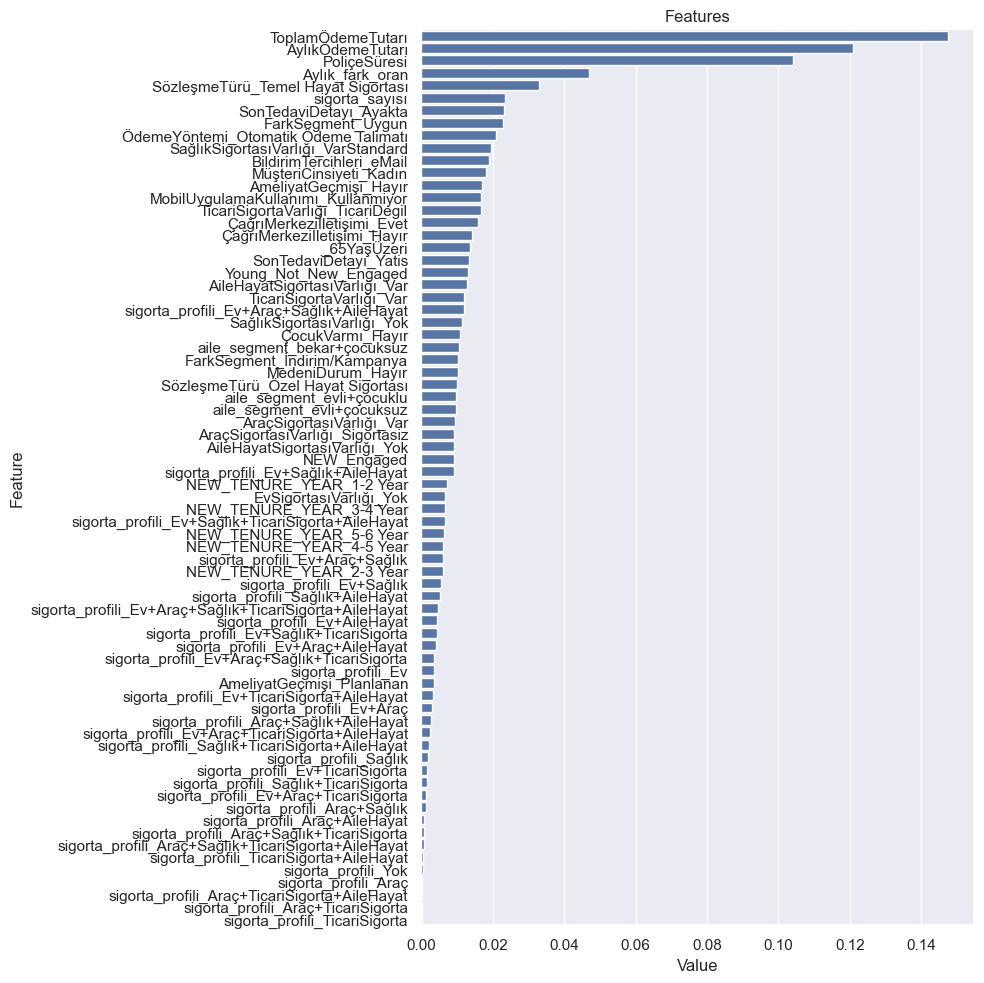

,Feature,Value
3,ToplamÖdemeTutarı,0.147
2,AylıkÖdemeTutarı,0.121
1,PoliçeSüresi,0.104
5,Aylık_fark_oran,0.047
27,SözleşmeTürü_Temel Hayat Sigortası,0.033
4,sigorta_sayısı,0.024
21,SonTedaviDetayı_Ayakta,0.023
65,FarkSegment_Uygun,0.023
30,ÖdemeYöntemi_Otomatik Ödeme Talimatı,0.021
14,SağlıkSigortasıVarlığı_VarStandard,0.019


In [354]:
plot_importance(rf_model, X)

In [355]:
feature_imp = pd.DataFrame({
    'Feature': rf_model.feature_names_in_,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
feature_imp.to_excel("feature_importance.xlsx", index=False)

In [356]:
##dfm.to_excel("final_13.09.xlsx", index=False)

In [357]:
dfm.head()

,_65YaşÜzeri,PoliçeSüresi,AylıkÖdemeTutarı,ToplamÖdemeTutarı,sigorta_sayısı,Aylık_fark_oran,not_renew,NEW_Engaged,Young_Not_New_Engaged,MüşteriCinsiyeti_Kadın,MedeniDurum_Hayır,ÇocukVarmı_Hayır,EvSigortasıVarlığı_Yok,AraçSigortasıVarlığı_Sigortasiz,AraçSigortasıVarlığı_Var,SağlıkSigortasıVarlığı_VarStandard,SağlıkSigortasıVarlığı_Yok,TicariSigortaVarlığı_TicariDegil,TicariSigortaVarlığı_Var,MobilUygulamaKullanımı_Kullanmiyor,ÇağrıMerkeziİletişimi_Evet,ÇağrıMerkeziİletişimi_Hayır,SonTedaviDetayı_Ayakta,SonTedaviDetayı_Yatis,AmeliyatGeçmişi_Hayır,AmeliyatGeçmişi_Planlanan,AileHayatSigortasıVarlığı_Var,AileHayatSigortasıVarlığı_Yok,SözleşmeTürü_Temel Hayat Sigortası,SözleşmeTürü_Özel Hayat Sigortası,BildirimTercihleri_eMail,ÖdemeYöntemi_Otomatik Ödeme Talimatı,aile_segment_bekar+çocuksuz,aile_segment_evli+çocuklu,aile_segment_evli+çocuksuz,sigorta_profili_Araç,sigorta_profili_Araç+AileHayat,sigorta_profili_Araç+Sağlık,sigorta_profili_Araç+Sağlık+AileHayat,sigorta_profili_Araç+Sağlık+TicariSigorta,sigorta_profili_Araç+Sağlık+TicariSigorta+AileHayat,sigorta_profili_Araç+TicariSigorta,sigorta_profili_Araç+TicariSigorta+AileHayat,sigorta_profili_Ev,sigorta_profili_Ev+AileHayat,sigorta_profili_Ev+Araç,sigorta_profili_Ev+Araç+AileHayat,sigorta_profili_Ev+Araç+Sağlık,sigorta_profili_Ev+Araç+Sağlık+AileHayat,sigorta_profili_Ev+Araç+Sağlık+TicariSigorta,sigorta_profili_Ev+Araç+Sağlık+TicariSigorta+AileHayat,sigorta_profili_Ev+Araç+TicariSigorta,sigorta_profili_Ev+Araç+TicariSigorta+AileHayat,sigorta_profili_Ev+Sağlık,sigorta_profili_Ev+Sağlık+AileHayat,sigorta_profili_Ev+Sağlık+TicariSigorta,sigorta_profili_Ev+Sağlık+TicariSigorta+AileHayat,sigorta_profili_Ev+TicariSigorta,sigorta_profili_Ev+TicariSigorta+AileHayat,sigorta_profili_Sağlık,sigorta_profili_Sağlık+AileHayat,sigorta_profili_Sağlık+TicariSigorta,sigorta_profili_Sağlık+TicariSigorta+AileHayat,sigorta_profili_TicariSigorta,sigorta_profili_TicariSigorta+AileHayat,sigorta_profili_Yok,FarkSegment_Uygun,FarkSegment_İndirim/Kampanya,NEW_TENURE_YEAR_1-2 Year,NEW_TENURE_YEAR_2-3 Year,NEW_TENURE_YEAR_3-4 Year,NEW_TENURE_YEAR_4-5 Year,NEW_TENURE_YEAR_5-6 Year
0,0,1,30,30,1,1,0,1,0,1,0,1,1,1,0,1,0,0,0,0,1,0,1,0,1,0,0,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,34,57,1890,4,0,1,0,1,0,1,1,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
2,0,2,54,108,4,1,1,1,0,0,1,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,45,42,1841,3,0,1,0,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
4,0,2,71,152,3,1,0,1,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Risk model

In [358]:
rf_model = rf_final

In [359]:

# Olasılıklar ([:,1] → pozitif sınıf yani 'yenilemez' ihtimali)
probas = rf_model.predict_proba(X)[:,1]

In [360]:
# Risk score (0-100)
risk_score = (probas * 100).round(2)

In [361]:
# Segmentlere ayır
def bucket(s):
    if s >= 80: return "Çok Yüksek Risk"
    if s >= 60: return "Yüksek Risk"
    if s >= 40: return "Orta Risk"
    if s >= 20: return "Düşük Risk"
    return "Çok Düşük Risk"

segments = [bucket(s) for s in risk_score]

In [362]:
# Sonuç DataFrame
import pandas as pd
dfm_results = pd.DataFrame({
    "risk_score": risk_score,
    "risk_segment": segments,
    "pred_label": rf_model.predict(X)
})

print(dfm_results.head())

   risk_score risk_segment  pred_label
0      54.120    Orta Risk           1
1      32.690   Düşük Risk           0
2      61.930  Yüksek Risk           1
3      23.920   Düşük Risk           0
4      49.420    Orta Risk           0


In [363]:
dfm.head()

,_65YaşÜzeri,PoliçeSüresi,AylıkÖdemeTutarı,ToplamÖdemeTutarı,sigorta_sayısı,Aylık_fark_oran,not_renew,NEW_Engaged,Young_Not_New_Engaged,MüşteriCinsiyeti_Kadın,MedeniDurum_Hayır,ÇocukVarmı_Hayır,EvSigortasıVarlığı_Yok,AraçSigortasıVarlığı_Sigortasiz,AraçSigortasıVarlığı_Var,SağlıkSigortasıVarlığı_VarStandard,SağlıkSigortasıVarlığı_Yok,TicariSigortaVarlığı_TicariDegil,TicariSigortaVarlığı_Var,MobilUygulamaKullanımı_Kullanmiyor,ÇağrıMerkeziİletişimi_Evet,ÇağrıMerkeziİletişimi_Hayır,SonTedaviDetayı_Ayakta,SonTedaviDetayı_Yatis,AmeliyatGeçmişi_Hayır,AmeliyatGeçmişi_Planlanan,AileHayatSigortasıVarlığı_Var,AileHayatSigortasıVarlığı_Yok,SözleşmeTürü_Temel Hayat Sigortası,SözleşmeTürü_Özel Hayat Sigortası,BildirimTercihleri_eMail,ÖdemeYöntemi_Otomatik Ödeme Talimatı,aile_segment_bekar+çocuksuz,aile_segment_evli+çocuklu,aile_segment_evli+çocuksuz,sigorta_profili_Araç,sigorta_profili_Araç+AileHayat,sigorta_profili_Araç+Sağlık,sigorta_profili_Araç+Sağlık+AileHayat,sigorta_profili_Araç+Sağlık+TicariSigorta,sigorta_profili_Araç+Sağlık+TicariSigorta+AileHayat,sigorta_profili_Araç+TicariSigorta,sigorta_profili_Araç+TicariSigorta+AileHayat,sigorta_profili_Ev,sigorta_profili_Ev+AileHayat,sigorta_profili_Ev+Araç,sigorta_profili_Ev+Araç+AileHayat,sigorta_profili_Ev+Araç+Sağlık,sigorta_profili_Ev+Araç+Sağlık+AileHayat,sigorta_profili_Ev+Araç+Sağlık+TicariSigorta,sigorta_profili_Ev+Araç+Sağlık+TicariSigorta+AileHayat,sigorta_profili_Ev+Araç+TicariSigorta,sigorta_profili_Ev+Araç+TicariSigorta+AileHayat,sigorta_profili_Ev+Sağlık,sigorta_profili_Ev+Sağlık+AileHayat,sigorta_profili_Ev+Sağlık+TicariSigorta,sigorta_profili_Ev+Sağlık+TicariSigorta+AileHayat,sigorta_profili_Ev+TicariSigorta,sigorta_profili_Ev+TicariSigorta+AileHayat,sigorta_profili_Sağlık,sigorta_profili_Sağlık+AileHayat,sigorta_profili_Sağlık+TicariSigorta,sigorta_profili_Sağlık+TicariSigorta+AileHayat,sigorta_profili_TicariSigorta,sigorta_profili_TicariSigorta+AileHayat,sigorta_profili_Yok,FarkSegment_Uygun,FarkSegment_İndirim/Kampanya,NEW_TENURE_YEAR_1-2 Year,NEW_TENURE_YEAR_2-3 Year,NEW_TENURE_YEAR_3-4 Year,NEW_TENURE_YEAR_4-5 Year,NEW_TENURE_YEAR_5-6 Year
0,0,1,30,30,1,1,0,1,0,1,0,1,1,1,0,1,0,0,0,0,1,0,1,0,1,0,0,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,34,57,1890,4,0,1,0,1,0,1,1,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
2,0,2,54,108,4,1,1,1,0,0,1,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,45,42,1841,3,0,1,0,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
4,0,2,71,152,3,1,0,1,0,1,1,1,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [369]:
dfm_results = pd.DataFrame({
    "risk_score": risk_score,
    "risk_segment": segments,
    "pred_label": rf_model.predict(X),
    # İsteğe bağlı birkaç ana feature ekle:
    "ToplamÖdemeTutarı": dfm["ToplamÖdemeTutarı"],
    "sigorta_sayısı": dfm["sigorta_sayısı"],
    "PoliçeSüresi": dfm ["PoliçeSüresi"]
})

print(dfm_results.head())

dfm_results.to_excel("risk_scores1.xlsx", index=False)

   risk_score risk_segment  pred_label  ToplamÖdemeTutarı  sigorta_sayısı  PoliçeSüresi
0      54.120    Orta Risk           1                 30               1             1
1      32.690   Düşük Risk           0               1890               4            34
2      61.930  Yüksek Risk           1                108               4             2
3      23.920   Düşük Risk           0               1841               3            45
4      49.420    Orta Risk           0                152               3             2
